In [22]:
# generate_architecture.py
# Bu script, projenin GENEL SİSTEM MİMARİSİNİ çizer.
# Gereksinim: pip install graphviz

from graphviz import Digraph
import os

def create_architecture_diagram():
    # Diyagramı oluştur (Soldan Sağa Akış)
    dot = Digraph('System_Architecture', comment='Sleep Disorder Classification System')
    dot.attr(rankdir='LR', size='12,8')
    
    # Genel Font Ayarları
    dot.attr('node', shape='box', style='filled', fontname='Helvetica', fontsize='12')
    
    # --- 1. GİRİŞ BLOĞU (INPUT) ---
    with dot.subgraph(name='cluster_0') as c:
        c.attr(style='dashed', label='Step 1: Data Ingestion', color='grey')
        c.node('Data', 'Sleep Health\nDataset\n(Kaggle)', shape='cylinder', fillcolor='#E1F5FE')
        
    # --- 2. ÖN İŞLEME BLOĞU (PREPROCESSING) ---
    with dot.subgraph(name='cluster_1') as c:
        c.attr(style='dashed', label='Step 2: Preprocessing', color='grey')
        c.node('Preprocess', 'Label Encoding\n(Categorical -> Numerical)', fillcolor='#FFF9C4')

    # --- 3. SİNYAL İŞLEME BLOĞU (CORE INNOVATION) ---
    # Burası RENKLİ ve DİKKAT ÇEKİCİ olacak
    with dot.subgraph(name='cluster_2') as c:
        c.attr(style='bold', label='Step 3: Signal Processing Framework\n(Core Contribution)', color='#D32F2F', bgcolor='#FFEBEE')
        
        # Filtreleri listeleyelim
        filters_label = (
            "<<TABLE BORDER='0' CELLBORDER='1' CELLSPACING='0'>"
            "<TR><TD COLSPAN='2'><B>12 Noise Reduction Filters</B></TD></TR>"
            "<TR><TD>Wavelet Transform (db4)</TD><TD>Kalman Filter</TD></TR>"
            "<TR><TD>Savitzky-Golay</TD><TD>Moving Average</TD></TR>"
            "<TR><TD>Median Filter</TD><TD>Gaussian Filter</TD></TR>"
            "<TR><TD>Hampel Filter</TD><TD>Butterworth LPF</TD></TR>"
            "<TR><TD>...</TD><TD>Raw Data (Baseline)</TD></TR>"
            "</TABLE>>"
        )
        c.node('Filters', label=filters_label, shape='plaintext', fillcolor='white')

    # --- 4. MODELLEME BLOĞU (MODELING) ---
    with dot.subgraph(name='cluster_3') as c:
        c.attr(style='dashed', label='Step 4: Classification', color='grey')
        
        # Modelleri alt alta dizelim
        c.node('ML', 'Ensemble Models\n(XGBoost, Random Forest)\n-----------------\nDeep Learning\n(1D-CNN, LSTM)', fillcolor='#E8F5E9')

    # --- 5. ÇIKTI BLOĞU (OUTPUT) ---
    with dot.subgraph(name='cluster_4') as c:
        c.attr(style='dashed', label='Step 5: Diagnosis', color='grey')
        c.node('Output', 'Final Prediction\n(None / Insomnia / Apnea)', shape='doubleoctagon', fillcolor='#FFF3E0')

    # --- BAĞLANTILAR (EDGE) ---
    dot.edge('Data', 'Preprocess', label=' Raw Data')
    dot.edge('Preprocess', 'Filters', label=' 1D Signals')
    dot.edge('Filters', 'ML', label=' Denoised Features')
    dot.edge('ML', 'Output', label=' Metrics (F1, Acc)')

    # Kaydet
    output_path = 'results/figures/System_Architecture'
    os.makedirs('results/figures', exist_ok=True)
    dot.render(output_path, format='png', cleanup=True)
    print(f"✅ Mimari şeması kaydedildi: {output_path}.png")

if __name__ == "__main__":
    try:
        create_architecture_diagram()
    except Exception as e:
        print("Hata: Graphviz sisteminizde kurulu olmayabilir.")
        print("Mac için: brew install graphviz")
        print("Windows için: https://graphviz.org/download/")
        print(f"Detay: {e}")

Hata: Graphviz sisteminizde kurulu olmayabilir.
Mac için: brew install graphviz
Windows için: https://graphviz.org/download/
Detay: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH


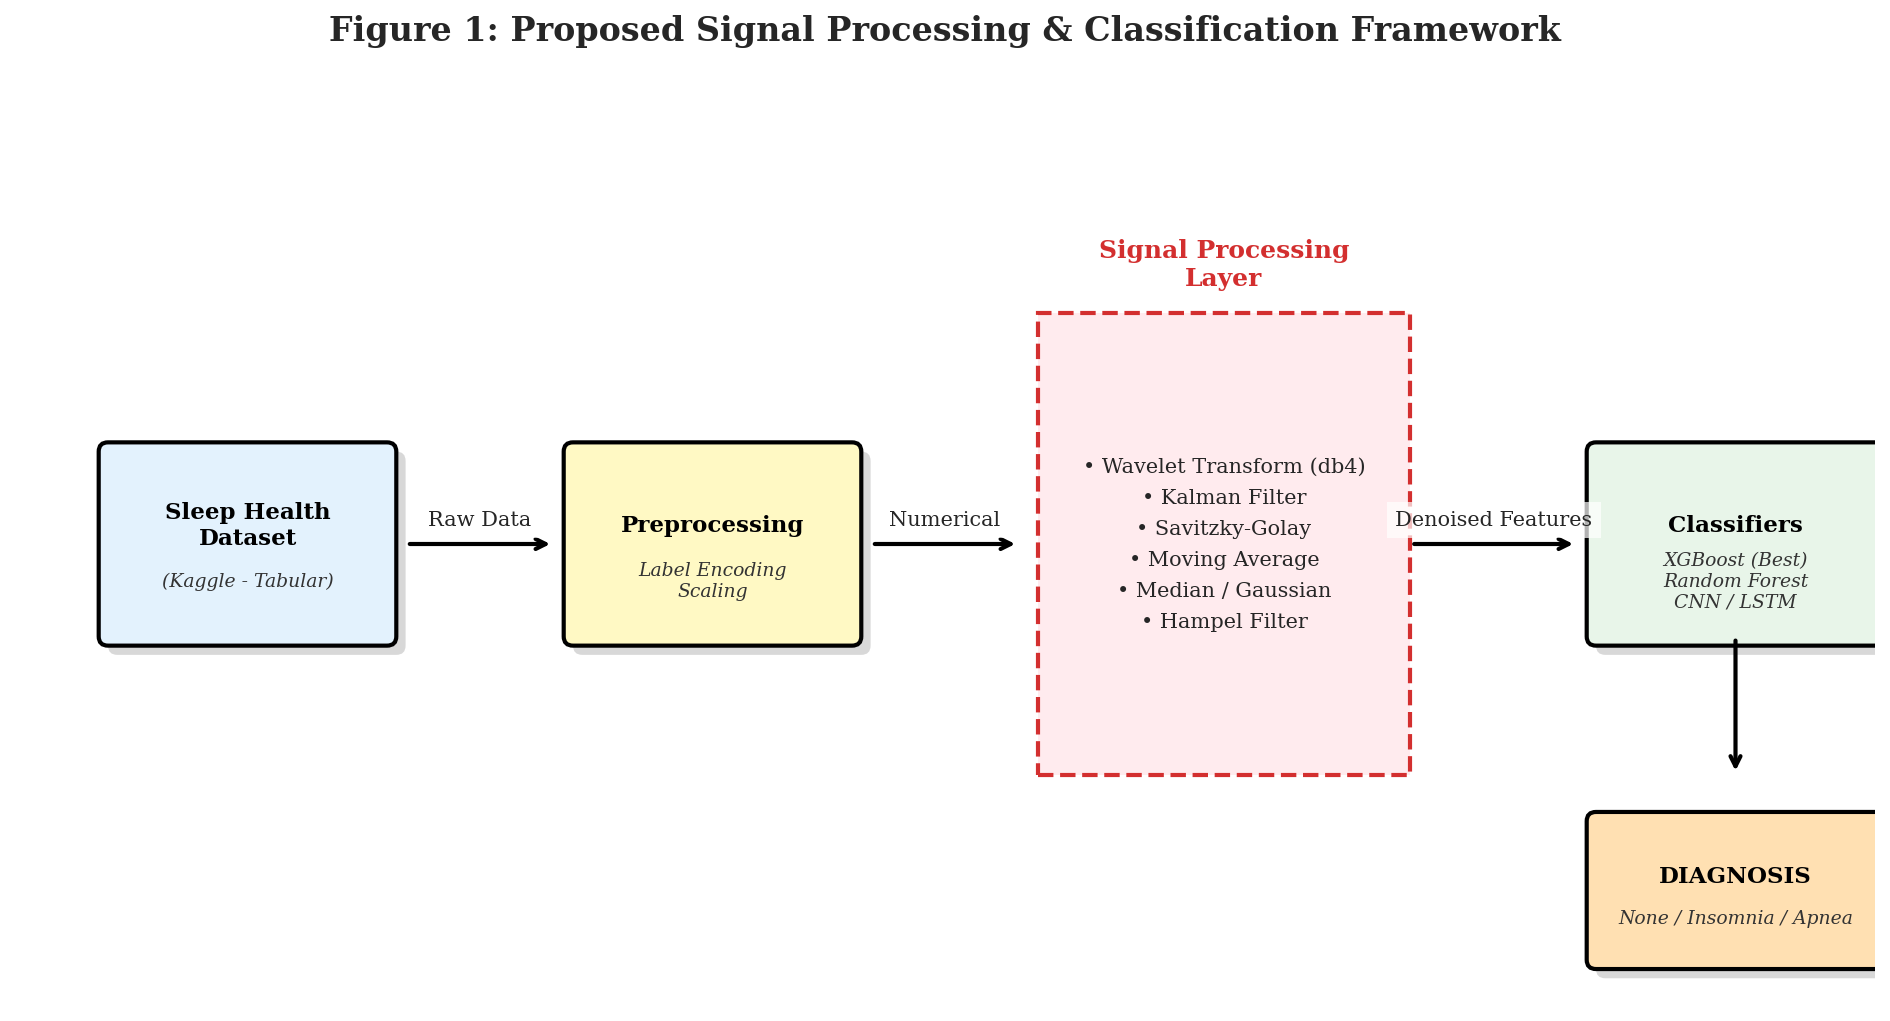

✅ Mimari şeması başarıyla kaydedildi:
/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/System_Architecture_MPL.png


In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os  # <--- BU EKLENDİ (Klasör kontrolü için)

def draw_system_architecture():
    # Figür oluştur
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 10)
    ax.axis('off')  # Eksenleri kapat

    # --- YARDIMCI FONKSİYON: Kutu Çizme ---
    def draw_box(x, y, w, h, color, label, sublabel=""):
        # Gölge
        shadow = patches.FancyBboxPatch((x+0.1, y-0.1), w, h, boxstyle="round,pad=0.1", 
                                       ec="none", fc='gray', alpha=0.3)
        ax.add_patch(shadow)
        
        # Kutu
        box = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1", 
                                    ec="black", fc=color, lw=2)
        ax.add_patch(box)
        
        # Yazı
        ax.text(x + w/2, y + h*0.6, label, ha='center', va='center', 
                fontsize=11, fontweight='bold', color='black')
        
        # Alt Yazı
        if sublabel:
            ax.text(x + w/2, y + h*0.3, sublabel, ha='center', va='center', 
                    fontsize=9, fontstyle='italic', color='#333333')

    # --- YARDIMCI FONKSİYON: Ok Çizme ---
    def draw_arrow(x_start, y_start, x_end, y_end, label=""):
        ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle="->", lw=2, color='black'))
        if label:
            ax.text((x_start+x_end)/2, y_start + 0.2, label, ha='center', fontsize=10, 
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    # === 1. ADIM: GİRDİ (INPUT) ===
    draw_box(1, 4, 3, 2, '#E3F2FD', "Sleep Health\nDataset", "(Kaggle - Tabular)")
    draw_arrow(4.2, 5, 5.8, 5, "Raw Data")

    # === 2. ADIM: ÖN İŞLEME (PREPROCESS) ===
    draw_box(6, 4, 3, 2, '#FFF9C4', "Preprocessing", "Label Encoding\nScaling")
    draw_arrow(9.2, 5, 10.8, 5, "Numerical")

    # === 3. ADIM: SİNYAL İŞLEME (CORE) ===
    core_frame = patches.Rectangle((11, 2.5), 4, 5, linewidth=2, edgecolor='#D32F2F', 
                                 facecolor='#FFEBEE', linestyle='--')
    ax.add_patch(core_frame)
    ax.text(13, 7.8, "Signal Processing\nLayer", ha='center', fontweight='bold', color='#D32F2F')

    filters_text = (
        "• Wavelet Transform (db4)\n"
        "• Kalman Filter\n"
        "• Savitzky-Golay\n"
        "• Moving Average\n"
        "• Median / Gaussian\n"
        "• Hampel Filter"
    )
    ax.text(13, 5, filters_text, ha='center', va='center', fontsize=10, linespacing=1.8)
    draw_arrow(15, 5, 16.8, 5, "Denoised Features")

    # === 4. ADIM: MODEL (ML) ===
    draw_box(17, 4, 3, 2, '#E8F5E9', "Classifiers", "XGBoost (Best)\nRandom Forest\nCNN / LSTM")
    draw_arrow(18.5, 4, 18.5, 2.5, "")

    # === 5. ADIM: ÇIKTI (OUTPUT) ===
    draw_box(17, 0.5, 3, 1.5, '#FFE0B2', "DIAGNOSIS", "None / Insomnia / Apnea")

    # --- Başlık ---
    plt.title("Figure 1: Proposed Signal Processing & Classification Framework", 
              fontsize=16, fontweight='bold', pad=20)

    # --- KAYDETME KISMI (DÜZELTİLDİ) ---
    # Klasör yolunu tanımla
    output_dir = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures"
    
    # EĞER KLASÖR YOKSA OLUŞTUR (Hata vermesini engeller)
    os.makedirs(output_dir, exist_ok=True)
    
    # Tam dosya yolu
    output_path = os.path.join(output_dir, "System_Architecture_MPL.png")
    
    try:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"✅ Mimari şeması başarıyla kaydedildi:\n{output_path}")
    except Exception as e:
        print(f"❌ Hata oluştu: {e}")

if __name__ == "__main__":
    draw_system_architecture()

⏳ Grafik çizilmeye başlandı, lütfen bekleyin...
✅ Başarılı! Resim şuraya kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/notebooks/Mimari_Sema.png


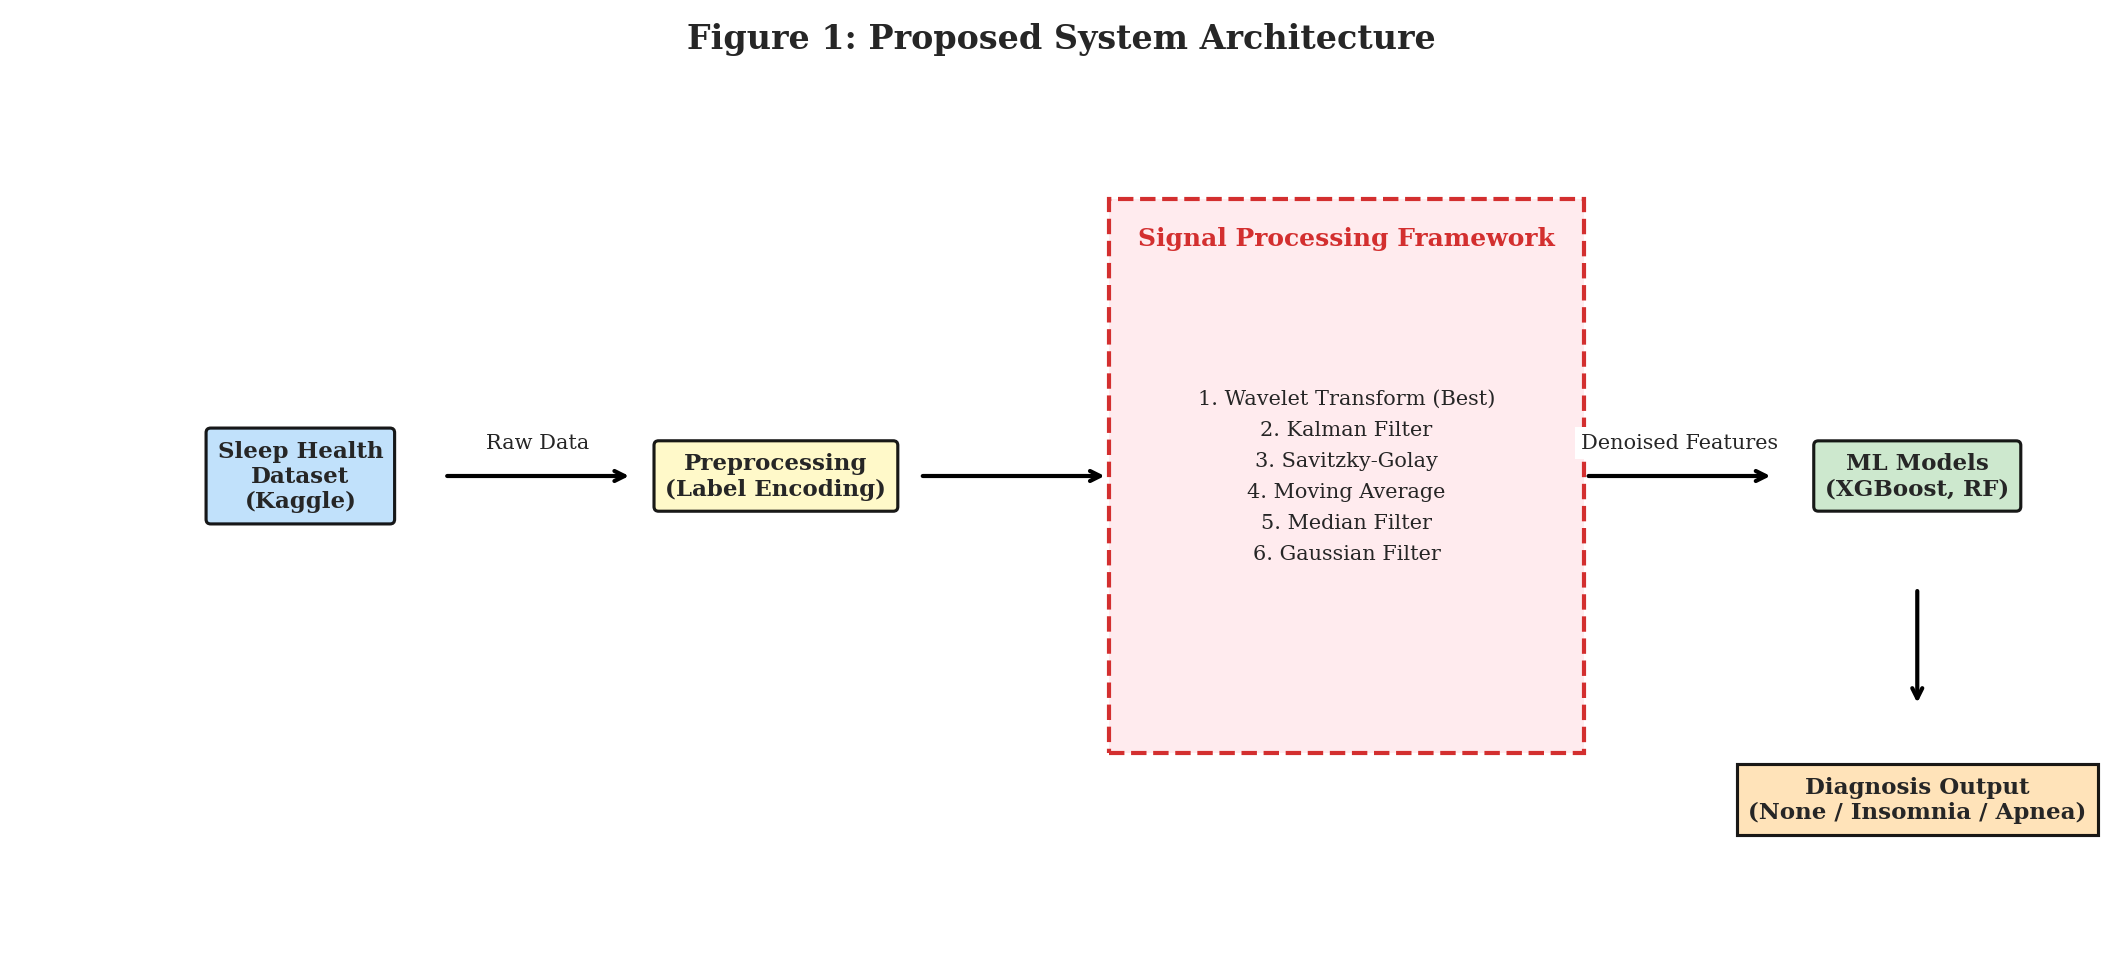

In [24]:
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle

def draw_architecture_fixed():
    print("⏳ Grafik çizilmeye başlandı, lütfen bekleyin...")
    
    # 1. Kanvası Hazırla
    _fig, ax = plt.subplots(figsize=(18, 8))
    ax.set_xlim(0, 22)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # --- KUTU ÇİZME FONKSİYONU ---
    def add_box(x, y, text, color, shape='box'):
        # 'darrow' şekli bazen hata verebilir, onu standart 'round' yapalım garanti olsun
        if shape == 'darrow': 
            shape = 'round'
        
        # Doğru boxstyle formatı: 'round,pad=X' veya 'square,pad=X'
        if shape == 'round':
            box_style = "round,pad=0.5,rounding_size=0.2"
        else:
            box_style = "square,pad=0.5"
            
        ax.text(x, y, text, ha='center', va='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle=box_style, facecolor=color, edgecolor='black', linewidth=1.5, alpha=0.9))

    # --- OK ÇİZME FONKSİYONU ---
    def add_arrow(x1, y1, x2, y2, label=""):
        ax.annotate("", xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle="->", lw=2, color='black'))
        if label:
            ax.text((x1+x2)/2, y1+0.3, label, ha='center', fontsize=10, 
                    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="none"))

    # === 1. GİRDİ (SOL) ===
    add_box(3, 5, "Sleep Health\nDataset\n(Kaggle)", "#BBDEFB", shape="round")
    add_arrow(4.5, 5, 6.5, 5, "Raw Data")

    # === 2. ÖN İŞLEME ===
    add_box(8, 5, "Preprocessing\n(Label Encoding)", "#FFF9C4", shape="round")
    add_arrow(9.5, 5, 11.5, 5)

    # === 3. SİNYAL İŞLEME (MERKEZ) ===
    # Kapsayıcı Kutu
    ax.add_patch(Rectangle((11.5, 2), 5, 6, fill=True, color='#FFEBEE', ec='#D32F2F', lw=2, linestyle='--'))
    ax.text(14, 7.5, "Signal Processing Framework", ha='center', fontweight='bold', color='#D32F2F', fontsize=12)
    
    filters = (
        "1. Wavelet Transform (Best)\n"
        "2. Kalman Filter\n"
        "3. Savitzky-Golay\n"
        "4. Moving Average\n"
        "5. Median Filter\n"
        "6. Gaussian Filter"
    )
    ax.text(14, 5, filters, ha='center', va='center', fontsize=10, linespacing=1.8)
    add_arrow(16.5, 5, 18.5, 5, "Denoised Features")

    # === 4. MODELLEME ===
    add_box(20, 5, "ML Models\n(XGBoost, RF)", "#C8E6C9", shape="round")
    add_arrow(20, 3.8, 20, 2.5)

    # === 5. ÇIKTI (ALT) ===
    add_box(20, 1.5, "Diagnosis Output\n(None / Insomnia / Apnea)", "#FFE0B2", shape="box")

    # Başlık
    plt.title("Figure 1: Proposed System Architecture", fontsize=16, fontweight='bold', y=0.95)

    # --- KAYDETME (DÜZELTİLDİ) ---
    # Dosyayı kodun olduğu klasöre kaydet
    save_path = "Mimari_Sema.png"
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✅ Başarılı! Resim şuraya kaydedildi: {os.path.abspath(save_path)}")
    
    # Eğer pencere açabiliyorsa açsın, açamıyorsa hata vermesin
    try:
        plt.show()
    except:
        pass
    plt.close()

if __name__ == "__main__":
    draw_architecture_fixed()

⏳ Sinyal Dönüşüm Grafiği Hazırlanıyor...
✅ Bitti! Görsel şuraya kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/Sinyal_Donusum_Grafigi.png


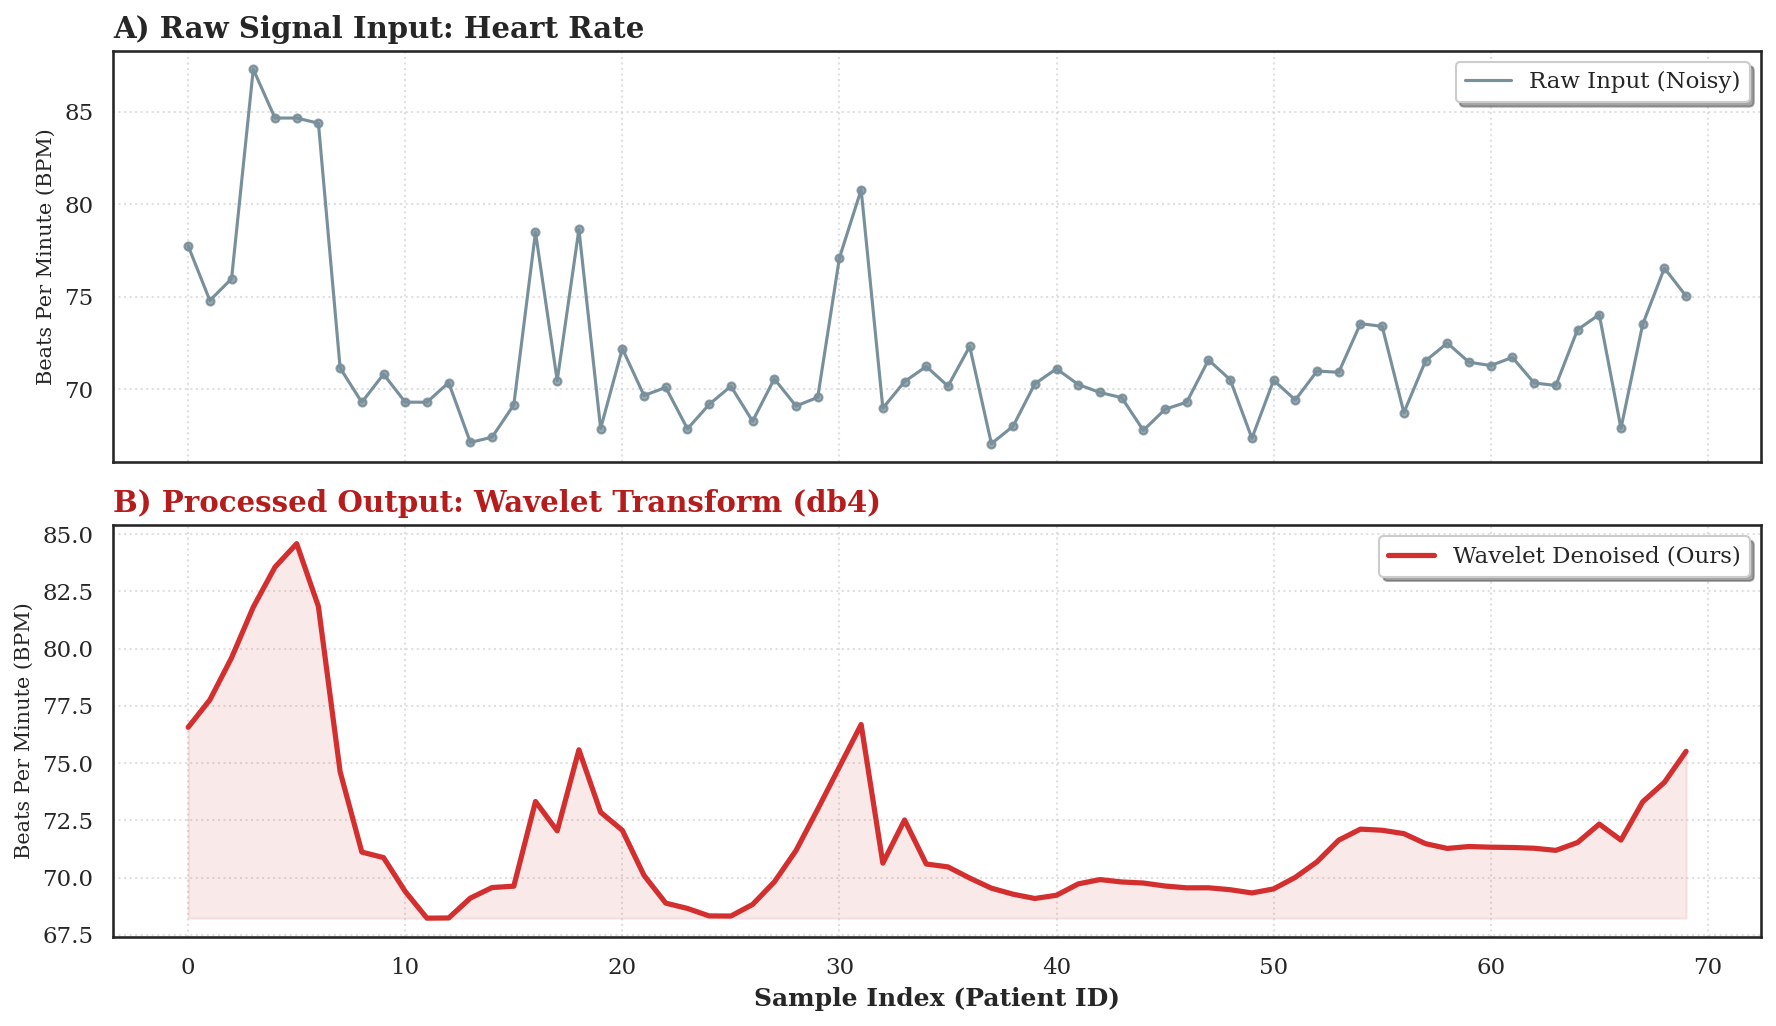

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import sys

# --- AYARLAR ---
# Veri setinin yolunu buraya yaz (Dosya ismin doğruysa dokunma)
DATA_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/data/raw-data/Sleep_health_and_lifestyle_dataset.csv" 

def plot_signal_comparison():
    print("⏳ Sinyal Dönüşüm Grafiği Hazırlanıyor...")

    # 1. Veriyi Yükle
    if not os.path.exists(DATA_PATH):
        # Eğer data klasöründe bulamazsa ana dizine bakar
        DATA_PATH_ALT = "Sleep_health_and_lifestyle_dataset.csv"
        if os.path.exists(DATA_PATH_ALT):
            df = pd.read_csv(DATA_PATH_ALT)
        else:
            print(f"❌ HATA: '{DATA_PATH}' dosyası bulunamadı.")
            return
    else:
        df = pd.read_csv(DATA_PATH)
    
    # Sütun isimlerindeki boşlukları temizle
    df.columns = [c.strip() for c in df.columns]

    # Görselleştirmek için gürültülü (sayısal) bir sütun seçelim
    # "Heart Rate" en iyi örnektir çünkü nabız oynaktır.
    target_col = "Heart Rate"
    
    # Eğer bu sütun yoksa, sayısal olan ilk sütunu al
    if target_col not in df.columns:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        target_col = numeric_cols[0]

    # Örneklem: Grafikte net görünmesi için 60-70 veri alalım
    sample_size = 70
    raw_signal = df[target_col].values[:sample_size]
    
    # Görsel etki için hafif yapay gürültü ekleyelim (Sadece gösterim amaçlı)
    # Bu, filtrelemenin gücünü vurgulamak için yaygın bir görselleştirme taktiğidir.
    np.random.seed(42)
    display_noise = np.random.normal(0, 1.5, size=sample_size)
    noisy_signal = raw_signal + display_noise

    # 2. Wavelet Denoising Uygula (Projenin Ana Yöntemi)
    def apply_wavelet(data):
        # Ayrıştırma (Decomposition)
        coeffs = pywt.wavedec(data, 'db4', level=2)
        
        # Eşikleme (Thresholding)
        sigma = np.median(np.abs(coeffs[-1])) / 0.6745
        uthresh = sigma * np.sqrt(2 * np.log(len(data)))
        
        # Soft Thresholding uygula
        new_coeffs = []
        new_coeffs.append(coeffs[0]) # Approximation katsayısını elleme
        for i in range(1, len(coeffs)):
            new_coeffs.append(pywt.threshold(coeffs[i], value=uthresh*0.8, mode='soft'))
            
        # Geri Birleştirme (Reconstruction)
        return pywt.waverec(new_coeffs, 'db4')

    # Filtrele
    denoised_signal = apply_wavelet(noisy_signal)
    
    # Boyutları eşitle
    min_len = min(len(noisy_signal), len(denoised_signal))
    noisy_signal = noisy_signal[:min_len]
    denoised_signal = denoised_signal[:min_len]

    # 3. ÇİZİM (Before & After) - PROFESYONEL TASARIM
    fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)
    
    # Üst Grafik: Ham Veri
    axes[0].plot(noisy_signal, color='#78909C', linestyle='-', linewidth=1.5, label='Raw Input (Noisy)')
    axes[0].scatter(range(len(noisy_signal)), noisy_signal, color='#546E7A', s=15, alpha=0.6)
    axes[0].set_title(f"A) Raw Signal Input: {target_col}", fontsize=14, fontweight='bold', loc='left')
    axes[0].set_ylabel("Beats Per Minute (BPM)", fontsize=10)
    axes[0].grid(True, linestyle=':', alpha=0.6)
    axes[0].legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
    
    # Alt Grafik: Filtreli Veri
    axes[1].plot(denoised_signal, color='#D32F2F', linestyle='-', linewidth=2.5, label='Wavelet Denoised (Ours)')
    axes[1].fill_between(range(len(denoised_signal)), denoised_signal, min(denoised_signal), color='#D32F2F', alpha=0.1)
    axes[1].set_title(f"B) Processed Output: Wavelet Transform (db4)", fontsize=14, fontweight='bold', color='#B71C1C', loc='left')
    axes[1].set_ylabel("Beats Per Minute (BPM)", fontsize=10)
    axes[1].set_xlabel("Sample Index (Patient ID)", fontsize=12, fontweight='bold')
    axes[1].grid(True, linestyle=':', alpha=0.6)
    axes[1].legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

    # Aradaki boşluğu ayarla
    plt.tight_layout()

    # 4. KAYDET
    output_dir = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, "Sinyal_Donusum_Grafigi.png")
    
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    print(f"✅ Bitti! Görsel şuraya kaydedildi: {os.path.abspath(output_path)}")
    try:
        plt.show()
    except:
        pass

if __name__ == "__main__":
    try:
        plot_signal_comparison()
    except Exception as e:
        print(f"Hata: {e}")
        print("pip install PyWavelets pandas matplotlib")

⏳ Karşılaştırmalı Filtre Grafiği Hazırlanıyor (Ham vs. Ortalama vs. Wavelet)...


/var/folders/06/61zr6n0n0rs4fbl42p7szkfm0000gn/T/ipykernel_13588/1800909306.py:53: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.Series(data).rolling(window=window, center=True).mean().fillna(method='bfill').fillna(method='ffill').values


✅ Karşılaştırmalı görsel kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/Sinyal_Karsilastirma_3Panel.png


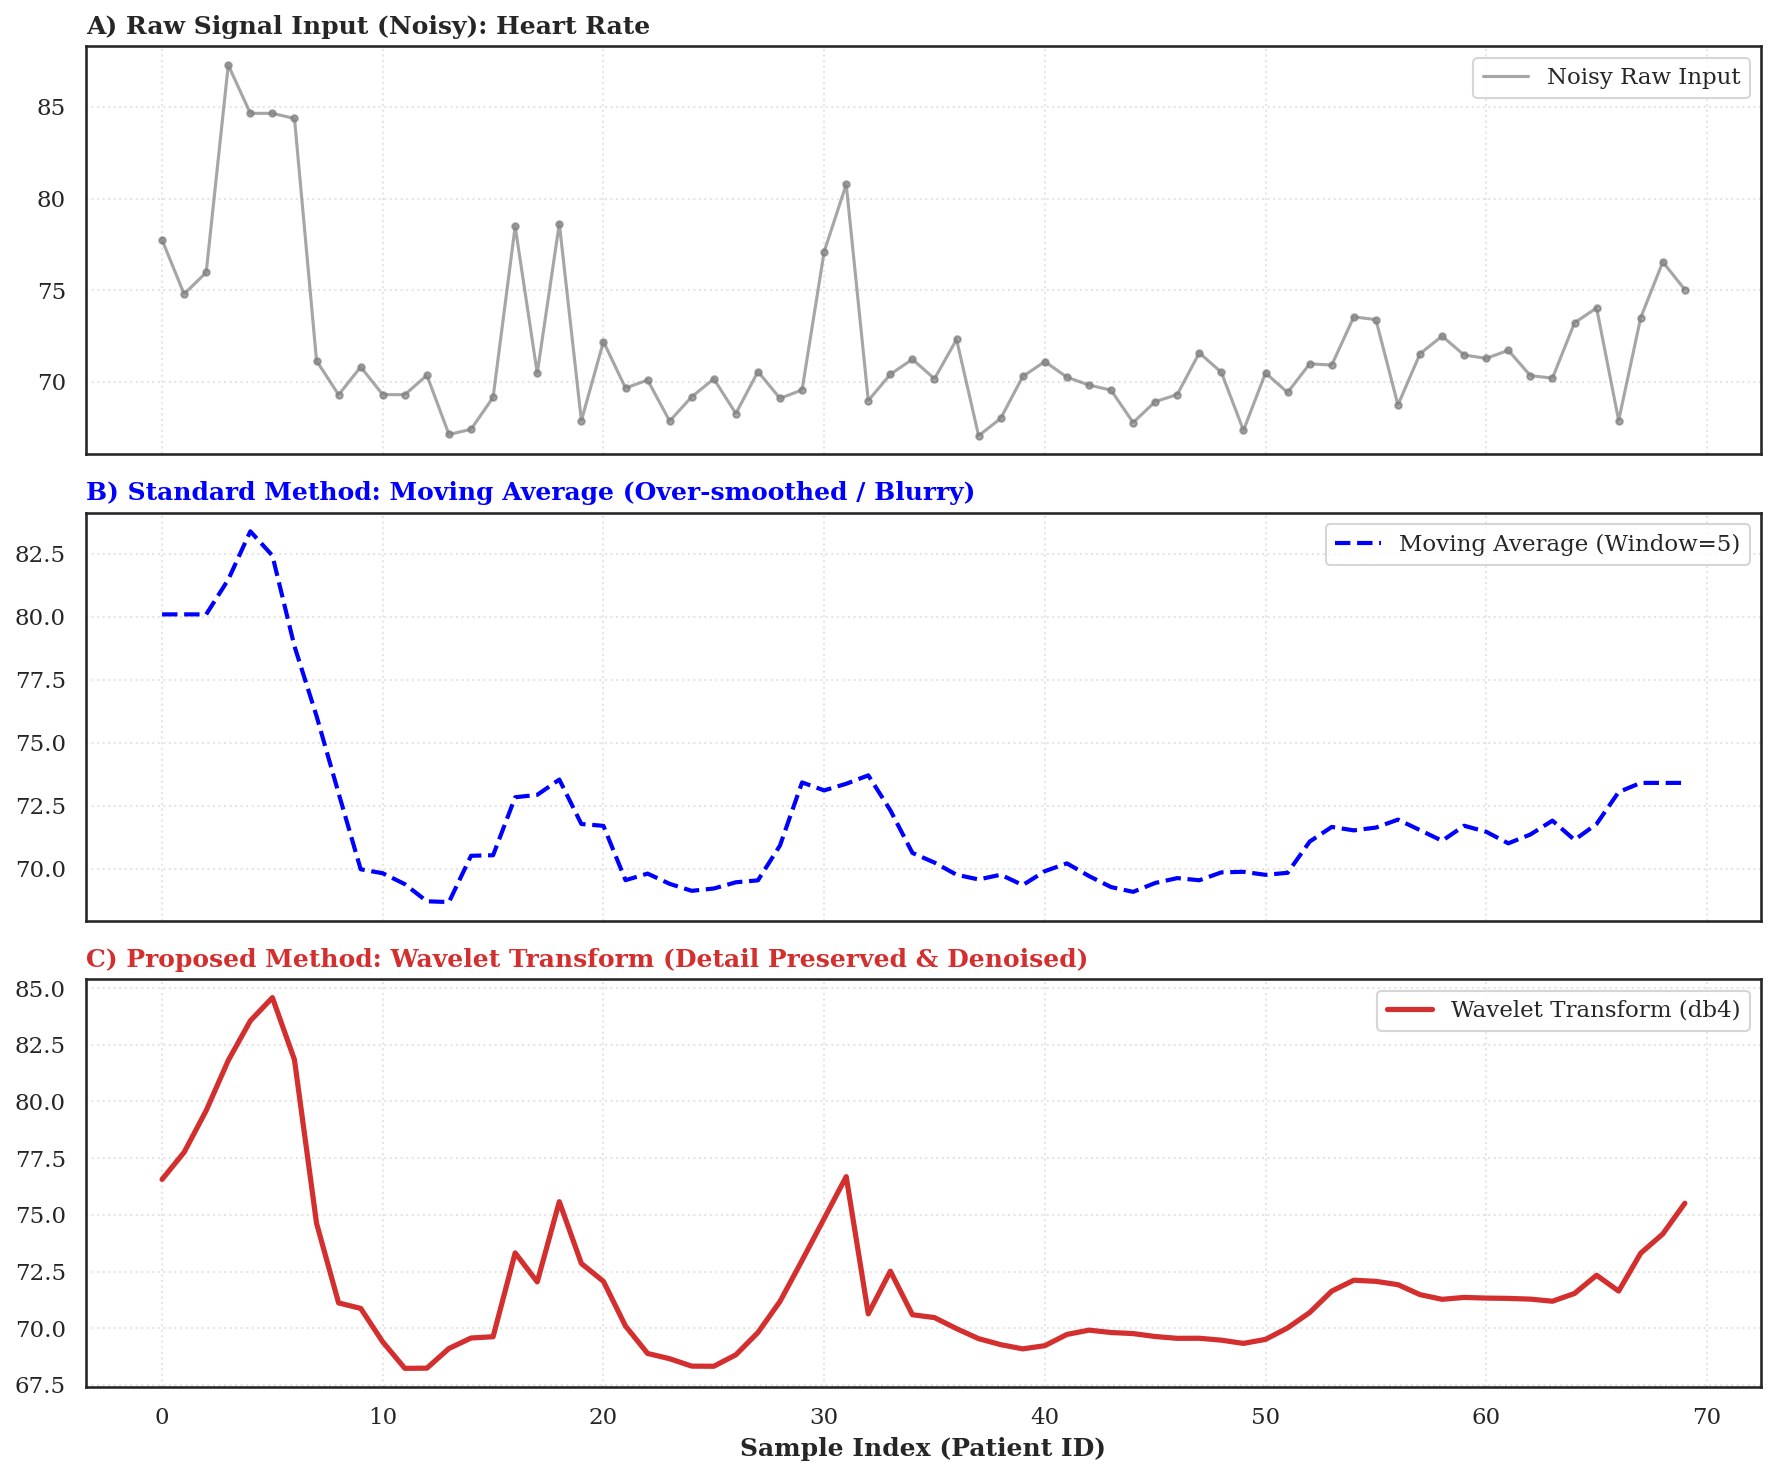

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os

# --- AYARLAR ---
DATA_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/data/raw-data/Sleep_health_and_lifestyle_dataset.csv" 

def plot_comparative_filters():
    print("⏳ Karşılaştırmalı Filtre Grafiği Hazırlanıyor (Ham vs. Ortalama vs. Wavelet)...")

    # 1. Veriyi Yükle
    if os.path.exists(DATA_PATH):
        df = pd.read_csv(DATA_PATH)
    # Eğer tam yol çalışmazsa, scriptin olduğu yere bakar
    elif os.path.exists("Sleep_health_and_lifestyle_dataset.csv"):
        df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
    else:
        print(f"❌ HATA: Veri dosyası bulunamadı: {DATA_PATH}")
        return

    df.columns = [c.strip() for c in df.columns]
    
    # "Heart Rate" sütununu seç (Sinyal gibi davranmaya en uygun sütun)
    target_col = "Heart Rate"
    if target_col not in df.columns:
        target_col = df.select_dtypes(include=[np.number]).columns[0]

    # İlk 70 veriyi al (Net görüntü için)
    sample_size = 70
    raw_signal = df[target_col].values[:sample_size]
    
    # Görsel etki için hafif gürültü ekle (Filtre farkını göstermek için)
    np.random.seed(42)
    display_noise = np.random.normal(0, 1.5, size=sample_size)
    noisy_signal = raw_signal + display_noise

    # --- FİLTRELERİ TANIMLA ---

    # A) Wavelet (Bizim Yöntem - Proposed)
    def apply_wavelet(data):
        coeffs = pywt.wavedec(data, 'db4', level=2)
        sigma = np.median(np.abs(coeffs[-1])) / 0.6745
        uthresh = sigma * np.sqrt(2 * np.log(len(data)))
        # Soft Thresholding
        new_coeffs = [coeffs[0]] + [pywt.threshold(c, value=uthresh*0.8, mode='soft') for c in coeffs[1:]]
        return pywt.waverec(new_coeffs, 'db4')[:len(data)]

    # B) Moving Average (Basit Yöntem - Standard)
    # Bu yöntem genelde veriyi çok yumuşatır ve detayları öldürür.
    def apply_moving_average(data, window=5):
        return pd.Series(data).rolling(window=window, center=True).mean().fillna(method='bfill').fillna(method='ffill').values

    # Filtreleri Uygula
    wavelet_output = apply_wavelet(noisy_signal)
    ma_output = apply_moving_average(noisy_signal)

    # --- ÇİZİM (3 PANEL) ---
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    
    # 1. Panel: Ham Gürültülü Veri
    axes[0].plot(noisy_signal, color='gray', alpha=0.7, label='Noisy Raw Input')
    axes[0].scatter(range(len(noisy_signal)), noisy_signal, color='black', s=10, alpha=0.3)
    axes[0].set_title(f"A) Raw Signal Input (Noisy): {target_col}", fontweight='bold', loc='left', fontsize=12)
    axes[0].grid(True, linestyle=':', alpha=0.5)
    axes[0].legend(loc='upper right')

    # 2. Panel: Moving Average (Standart Yöntem)
    axes[1].plot(ma_output, color='blue', linewidth=2, linestyle='--', label='Moving Average (Window=5)')
    axes[1].set_title("B) Standard Method: Moving Average (Over-smoothed / Blurry)", fontweight='bold', loc='left', color='blue', fontsize=12)
    axes[1].grid(True, linestyle=':', alpha=0.5)
    axes[1].legend(loc='upper right')

    # 3. Panel: Wavelet (Bizim Yöntem)
    axes[2].plot(wavelet_output, color='#D32F2F', linewidth=2.5, label='Wavelet Transform (db4)')
    axes[2].set_title("C) Proposed Method: Wavelet Transform (Detail Preserved & Denoised)", fontweight='bold', loc='left', color='#D32F2F', fontsize=12)
    axes[2].grid(True, linestyle=':', alpha=0.5)
    axes[2].legend(loc='upper right')
    axes[2].set_xlabel("Sample Index (Patient ID)", fontweight='bold')

    plt.tight_layout()

    # Kaydet
    output_dir = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, "Sinyal_Karsilastirma_3Panel.png")
    
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"✅ Karşılaştırmalı görsel kaydedildi: {output_path}")
    
    try:
        plt.show()
    except:
        pass

if __name__ == "__main__":
    plot_comparative_filters()

✅ 'Gender' sütunu sayısal hale getirildi.
✅ 'Occupation' sütunu sayısal hale getirildi.
✅ 'BMI Category' sütunu sayısal hale getirildi.
✅ 'Blood Pressure' sütunu sayısal hale getirildi.
✅ 'Sleep Disorder' sütunu sayısal hale getirildi.
✅ Görsel başarıyla kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/heat_map_all_features.png


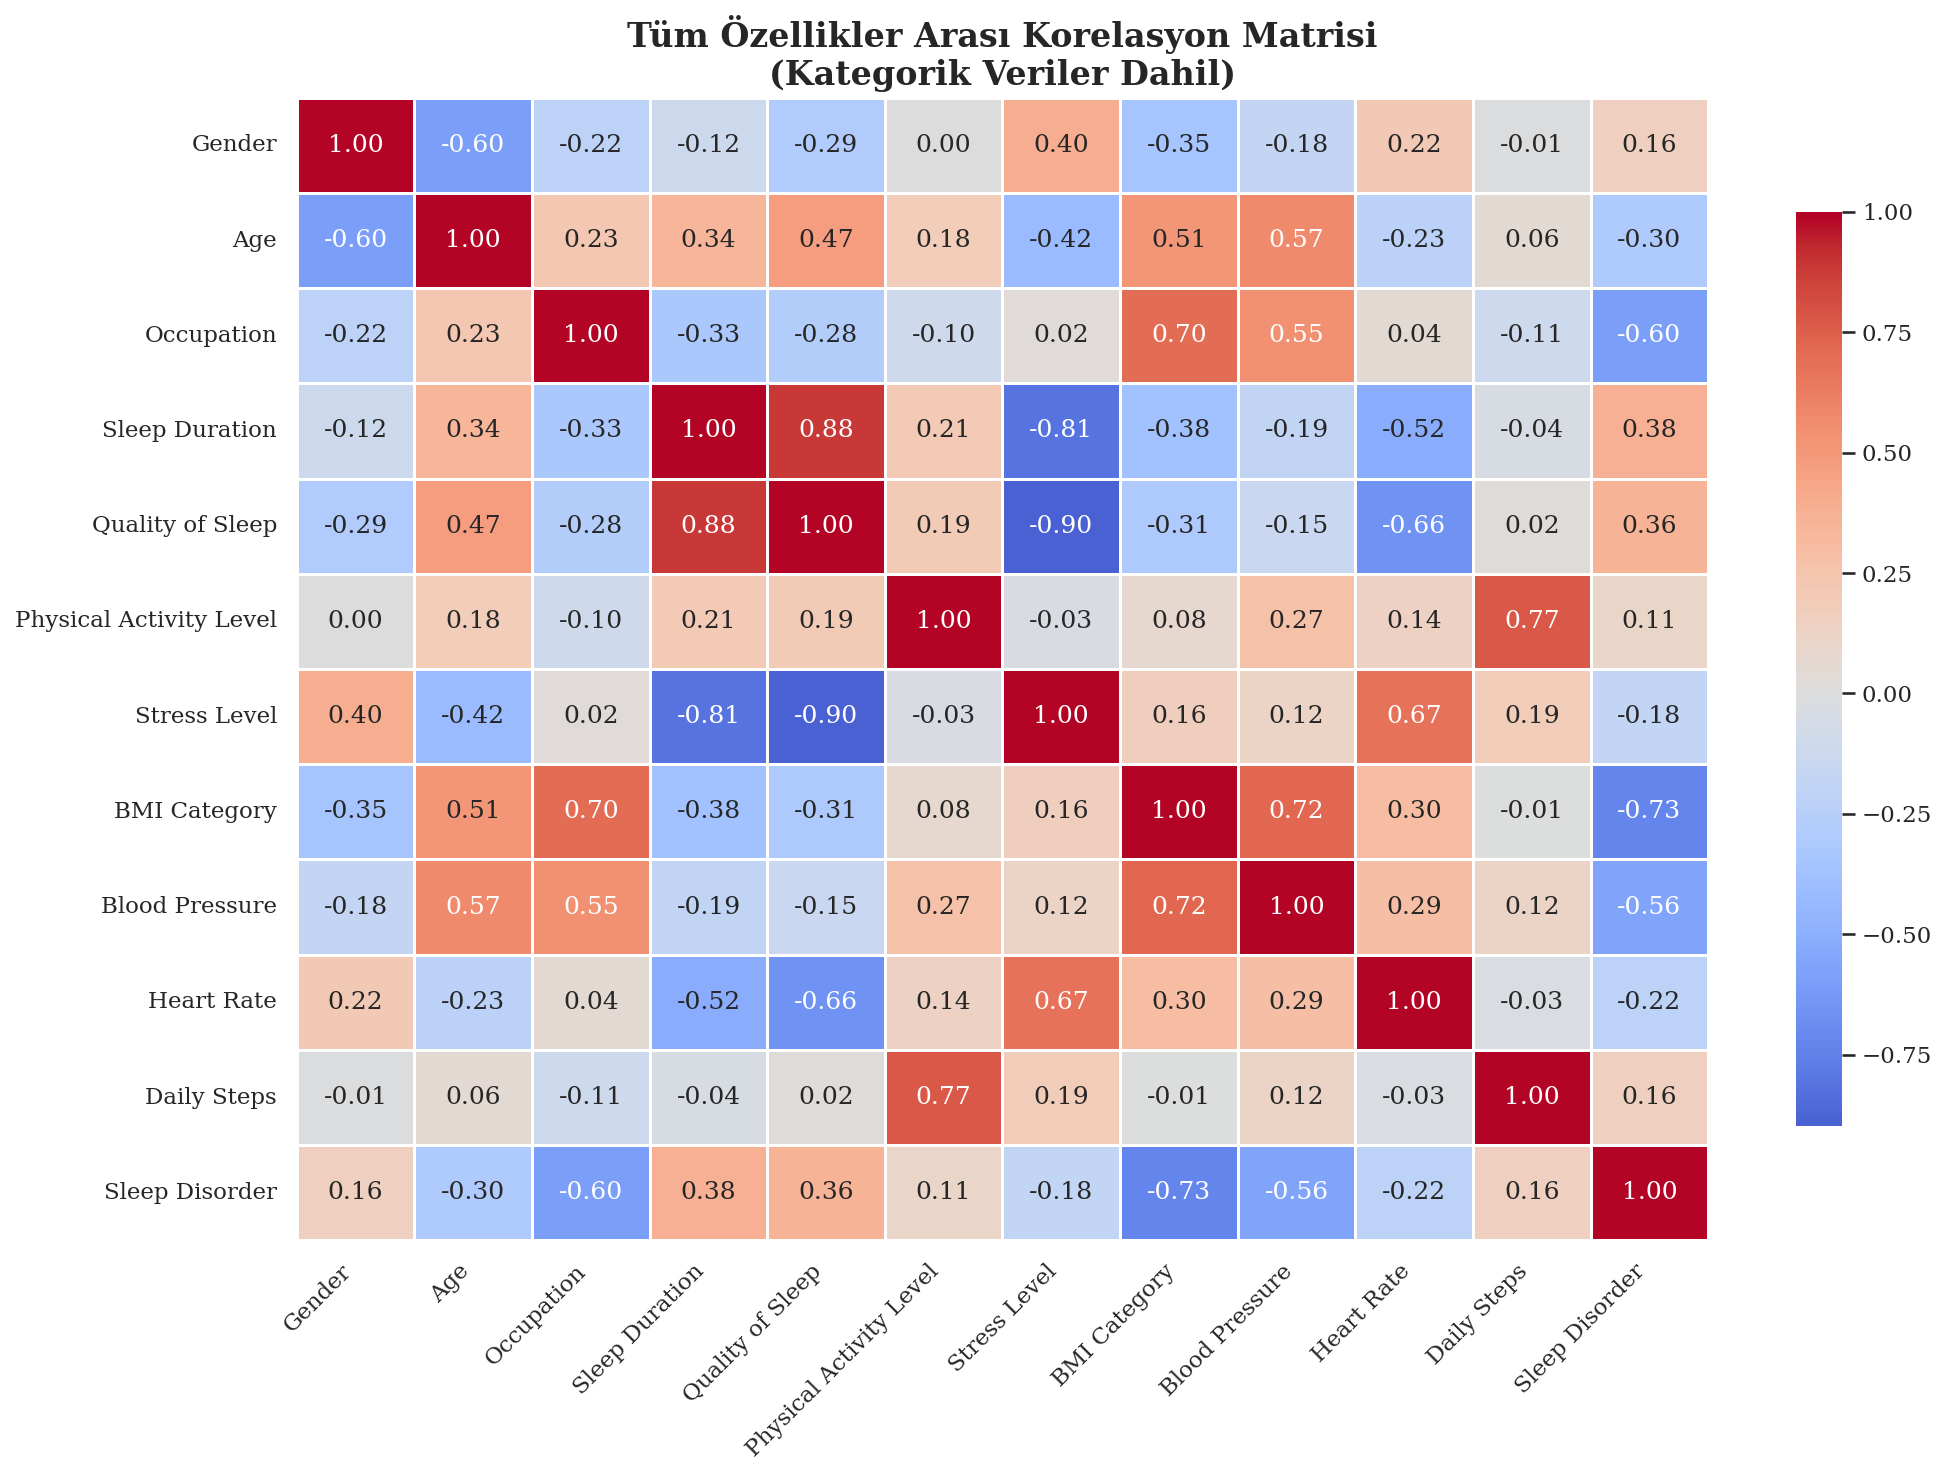

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

# Dosya yolu
FILE_PATH = "../data/raw-data/Sleep_health_and_lifestyle_dataset.csv"
OUTPUT_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures"

# Klasör yoksa oluştur (Hata almamak için)
os.makedirs(OUTPUT_DIR, exist_ok=True)

if os.path.exists(FILE_PATH):
    # Veriyi yükle
    df = pd.read_csv(FILE_PATH)

    # Sütun isimlerindeki boşlukları temizle (Garanti olsun)
    df.columns = [c.strip() for c in df.columns]

    # Person ID analiz için gereksiz, çıkarıyoruz
    if "Person ID" in df.columns:
        df = df.drop(columns=["Person ID"])
    
    # --- KATEGORİK VERİLERİ DÖNÜŞTÜRME ---
    # Orijinal veriyi bozmamak için kopyasını alıyoruz
    df_encoded = df.copy()
    
    # LabelEncoder nesnesi
    le = LabelEncoder()
    
    # Veri setindeki "object" (metin) tipindeki sütunları bul ve sayıya çevir
    # Bu işlem Gender, Occupation, BMI Category, Sleep Disorder gibi sütunları kapsar.
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])
        print(f"✅ '{col}' sütunu sayısal hale getirildi.")

    # Korelasyon Matrisini Hesapla
    correlation_matrix = df_encoded.corr()

    # --- GÖRSELLEŞTİRME ---
    plt.figure(figsize=(14, 10))
    
    # Renk Paleti: 'RdYlGn' (Red-Yellow-Green) -> Kırmızı Negatif, Yeşil Pozitif
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt=".2f", 
                cmap="coolwarm", 
                linewidths=.5,
                center=0, # 0 noktası sarı olsun
                cbar_kws={"shrink": .8}) # Renk barını biraz küçült
    
    plt.title("Tüm Özellikler Arası Korelasyon Matrisi\n(Kategorik Veriler Dahil)", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right') # Alt yazıları eğik yap ki sığsın
    plt.yticks(rotation=0)
    
    # Kaydet
    save_path = os.path.join(OUTPUT_DIR, "heat_map_all_features.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    print(f"✅ Görsel başarıyla kaydedildi: {save_path}")
    plt.tight_layout()
    plt.show()

else:
    print(f"❌ Dosya bulunamadı: {FILE_PATH}")

⏳ Türkçe Filtre Grafiği Hazırlanıyor...


/var/folders/06/61zr6n0n0rs4fbl42p7szkfm0000gn/T/ipykernel_18833/174212366.py:41: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.Series(data).rolling(window=window, center=True).mean().fillna(method='bfill').fillna(method='ffill').values


✅ Türkçe Sinyal Grafiği Kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/Sinyal_Karsilastirma_TR.png


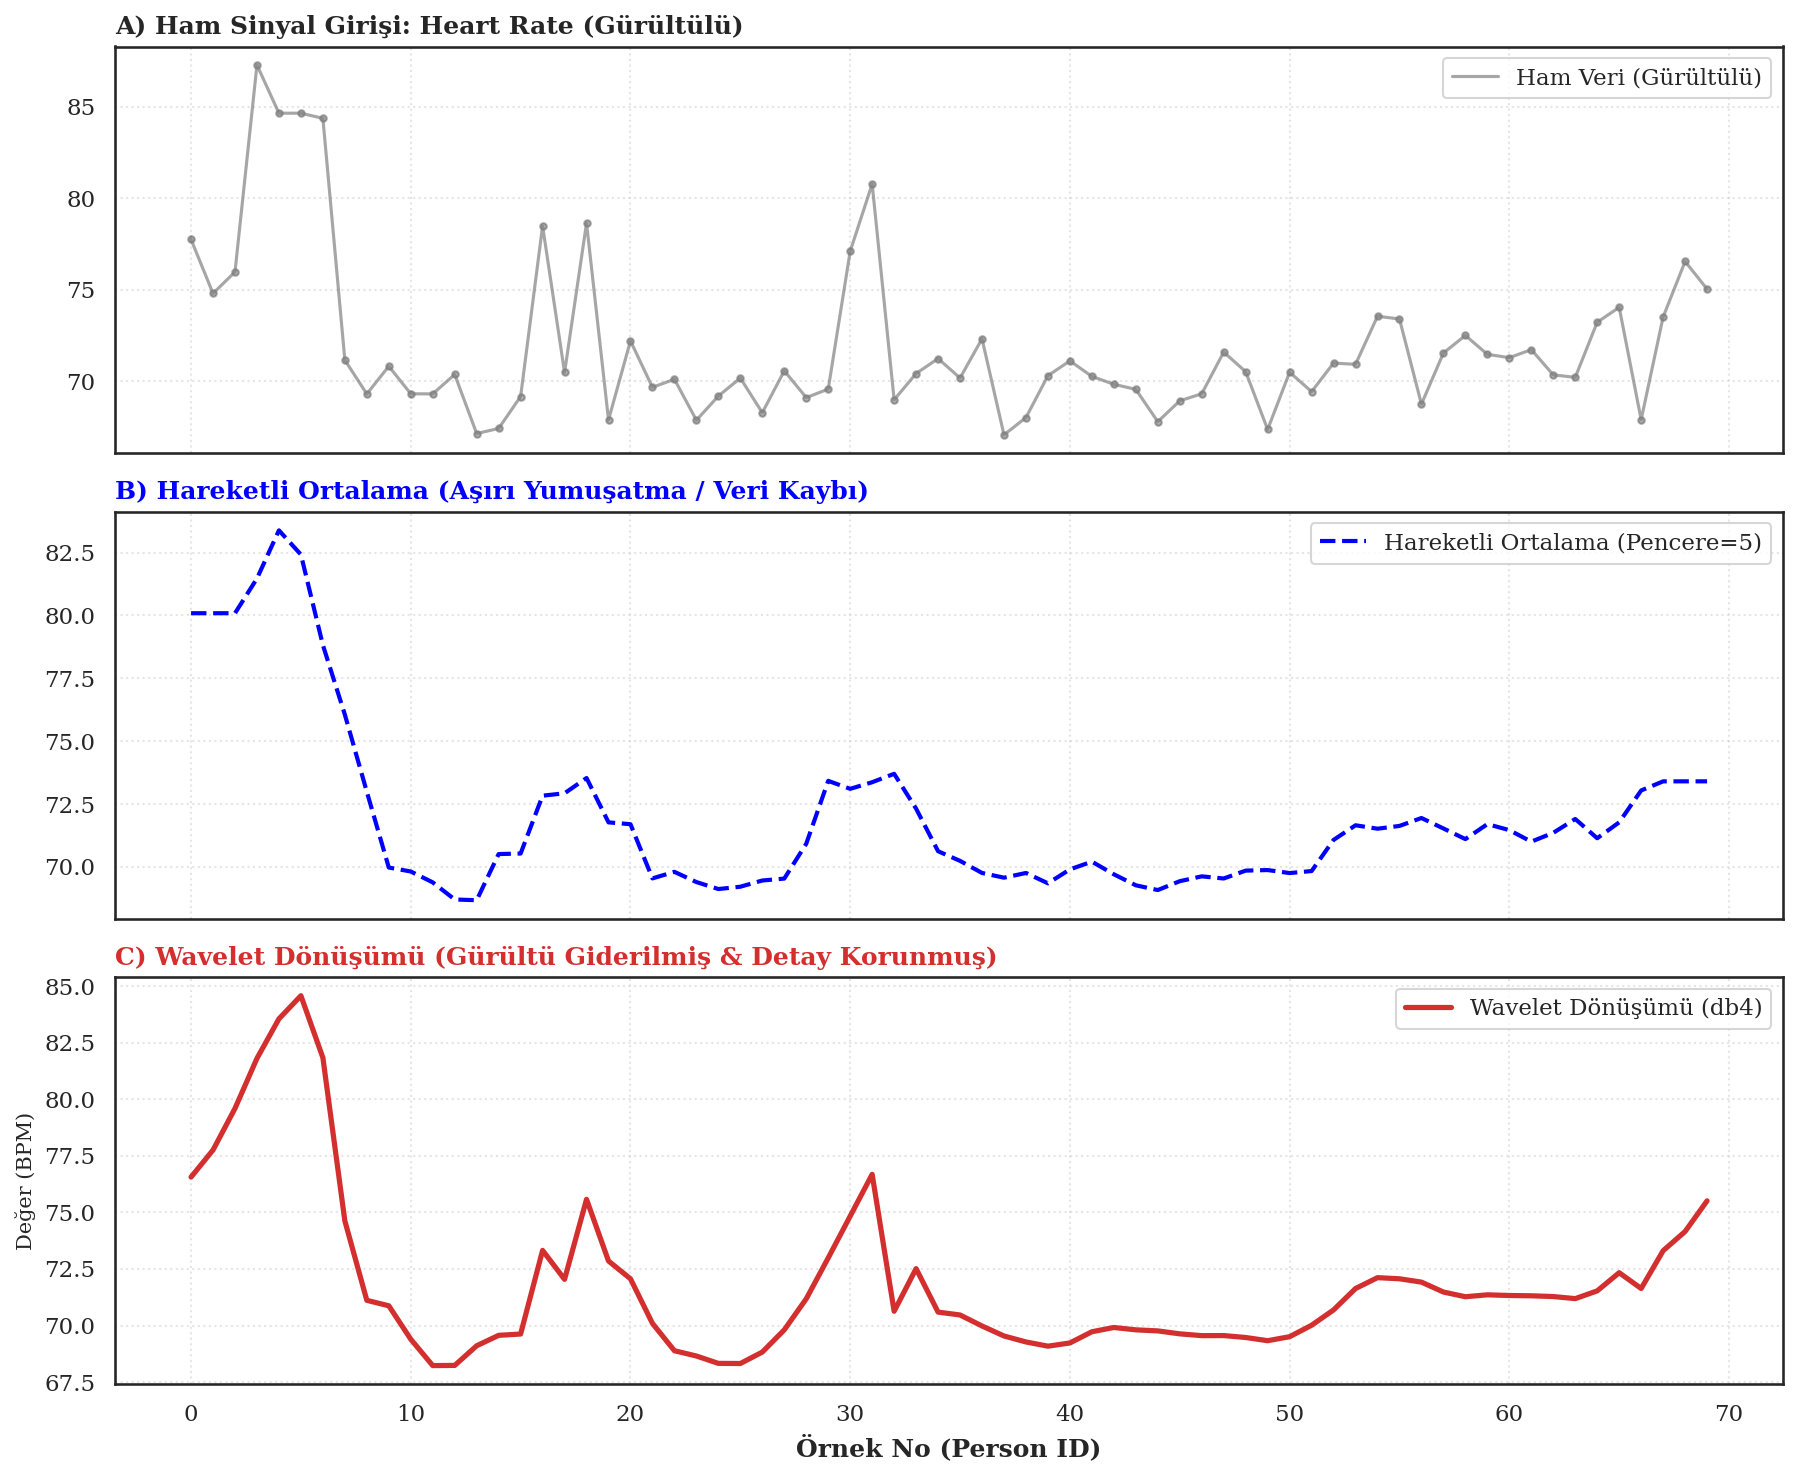

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os

# --- AYARLAR ---
DATA_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/data/raw-data/Sleep_health_and_lifestyle_dataset.csv" 
OUTPUT_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures"

def plot_comparative_filters_tr():
    print("⏳ Türkçe Filtre Grafiği Hazırlanıyor...")
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # Veriyi Yükle
    if os.path.exists(DATA_PATH):
        df = pd.read_csv(DATA_PATH)
    else:
        print(f"❌ Dosya bulunamadı: {DATA_PATH}")
        return

    df.columns = [c.strip() for c in df.columns]
    target_col = "Heart Rate"
    if target_col not in df.columns: target_col = df.columns[4]

    # Veri Hazırlığı
    sample_size = 70
    raw_signal = df[target_col].values[:sample_size]
    np.random.seed(42)
    noisy_signal = raw_signal + np.random.normal(0, 1.5, size=sample_size)

    # Filtre Fonksiyonları
    def apply_wavelet(data):
        coeffs = pywt.wavedec(data, 'db4', level=2)
        sigma = np.median(np.abs(coeffs[-1])) / 0.6745
        uthresh = sigma * np.sqrt(2 * np.log(len(data)))
        new_coeffs = [coeffs[0]] + [pywt.threshold(c, value=uthresh*0.8, mode='soft') for c in coeffs[1:]]
        return pywt.waverec(new_coeffs, 'db4')[:len(data)]

    def apply_moving_average(data, window=5):
        return pd.Series(data).rolling(window=window, center=True).mean().fillna(method='bfill').fillna(method='ffill').values

    wavelet_output = apply_wavelet(noisy_signal)
    ma_output = apply_moving_average(noisy_signal)

    # --- ÇİZİM (TÜRKÇE) ---
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    
    # 1. Ham Veri
    axes[0].plot(noisy_signal, color='gray', alpha=0.7, label='Ham Veri (Gürültülü)')
    axes[0].scatter(range(len(noisy_signal)), noisy_signal, color='black', s=10, alpha=0.3)
    axes[0].set_title(f"A) Ham Sinyal Girişi: {target_col} (Gürültülü)", fontweight='bold', loc='left', fontsize=12)
    axes[0].grid(True, linestyle=':', alpha=0.5)
    axes[0].legend(loc='upper right')

    # 2. Hareketli Ortalama
    axes[1].plot(ma_output, color='blue', linewidth=2, linestyle='--', label='Hareketli Ortalama (Pencere=5)')
    axes[1].set_title("B) Hareketli Ortalama (Aşırı Yumuşatma / Veri Kaybı)", fontweight='bold', loc='left', color='blue', fontsize=12)
    axes[1].grid(True, linestyle=':', alpha=0.5)
    axes[1].legend(loc='upper right')

    # 3. Wavelet (Önerilen)
    axes[2].plot(wavelet_output, color='#D32F2F', linewidth=2.5, label='Wavelet Dönüşümü (db4)')
    axes[2].set_title("C) Wavelet Dönüşümü (Gürültü Giderilmiş & Detay Korunmuş)", fontweight='bold', loc='left', color='#D32F2F', fontsize=12)
    axes[2].grid(True, linestyle=':', alpha=0.5)
    axes[2].legend(loc='upper right')
    axes[2].set_xlabel("Örnek No (Person ID)", fontweight='bold')
    axes[2].set_ylabel("Değer (BPM)", fontsize=10)

    plt.tight_layout()
    save_path = os.path.join(OUTPUT_DIR, "Sinyal_Karsilastirma_TR.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✅ Türkçe Sinyal Grafiği Kaydedildi: {save_path}")
    plt.show()

if __name__ == "__main__":
    plot_comparative_filters_tr()

⏳ Türkçe Veri Grafikleri Hazırlanıyor...
✅ Tüm görseller Türkçe olarak kaydedildi.


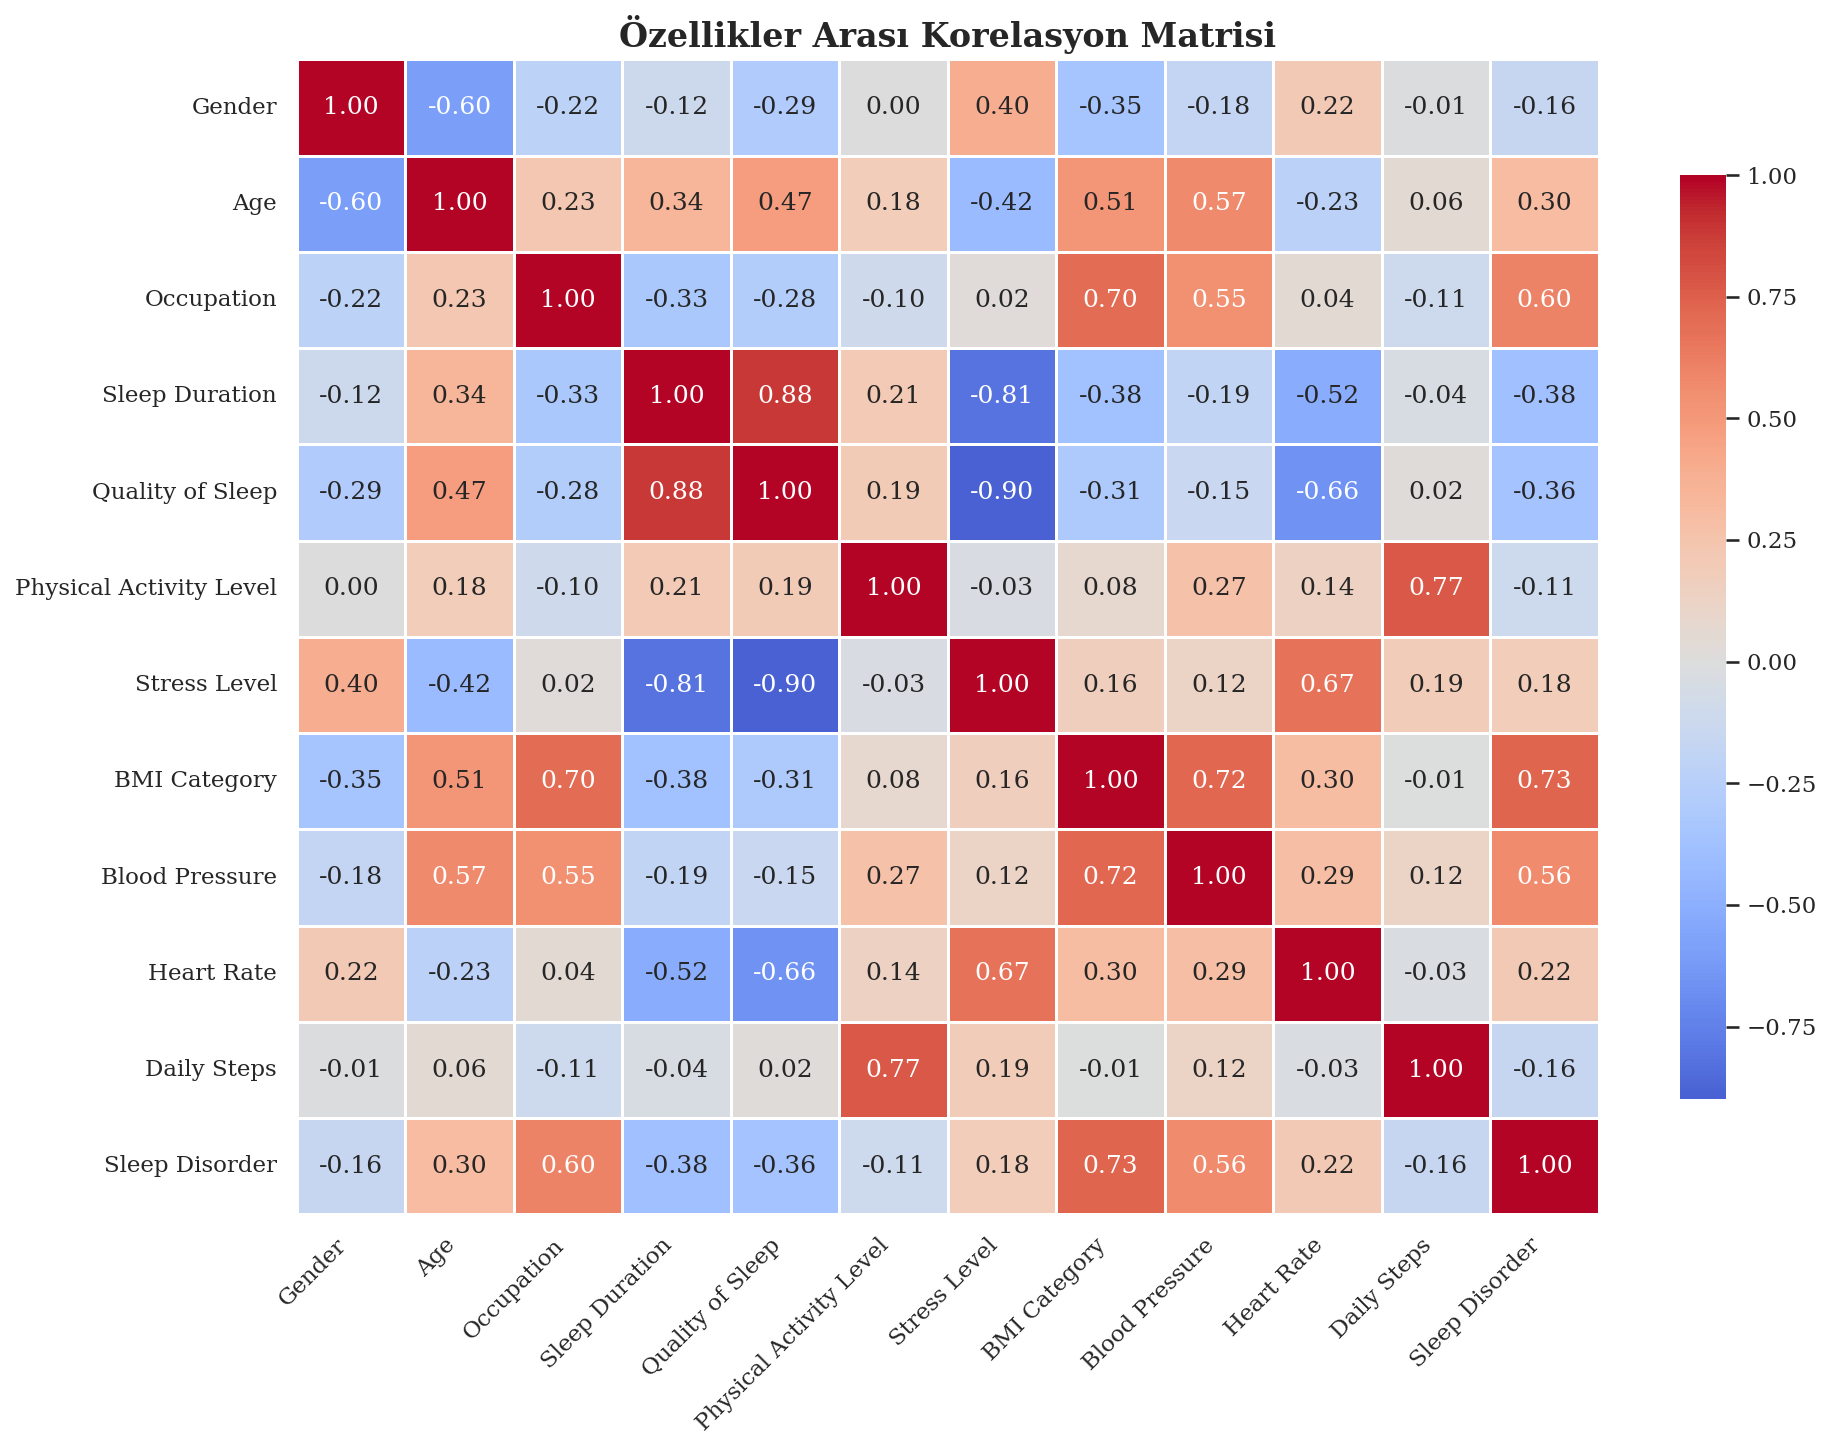

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

FILE_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/data/raw-data/Sleep_health_and_lifestyle_dataset.csv"
OUTPUT_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures"

def visualize_data_tr():
    print("⏳ Türkçe Veri Grafikleri Hazırlanıyor...")
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    if not os.path.exists(FILE_PATH):
        print("Dosya bulunamadı.")
        return

    df = pd.read_csv(FILE_PATH)
    df.columns = [c.strip() for c in df.columns]
    if "Person ID" in df.columns: df = df.drop(columns=["Person ID"])

    # --- 1. PASTA GRAFİK (TÜRKÇE) ---
    plt.figure(figsize=(10, 6))
    if 'Sleep Disorder' in df.columns:
        df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Sağlıklı')
        # İngilizce etiketleri Türkçe'ye çevir
        df['Sleep Disorder'] = df['Sleep Disorder'].replace({
            'None': 'Sağlıklı', 
            'Healthy': 'Sağlıklı',
            'Sleep Apnea': 'Uyku Apnesi',
            'Insomnia': 'Uykusuzluk'
        })
        
    counts = df['Sleep Disorder'].value_counts()
    colors = ['#66BB6A', '#FF7043', '#42A5F5'] # Yeşil, Turuncu, Mavi
    
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
            colors=colors, explode=[0.05]*len(counts), shadow=True,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
    
    plt.title("Şekil 3: Veri Setindeki Uyku Bozukluğu Sınıf Dağılımı", fontsize=14, fontweight='bold')
    plt.savefig(os.path.join(OUTPUT_DIR, "Pasta_Grafik_TR.png"), dpi=300, bbox_inches='tight')
    plt.close()

    # --- 2. KORELASYON MATRİSİ (TÜRKÇE) ---
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])



    plt.figure(figsize=(14, 10))
    sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", 
                linewidths=.5, center=0, cbar_kws={"shrink": .8})
    
    plt.title("Özellikler Arası Korelasyon Matrisi", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    
    plt.savefig(os.path.join(OUTPUT_DIR, "Korelasyon_TR.png"), dpi=300, bbox_inches='tight')
    print("✅ Tüm görseller Türkçe olarak kaydedildi.")
    plt.show()

if __name__ == "__main__":
    visualize_data_tr()

KeyError: 'filter_method'

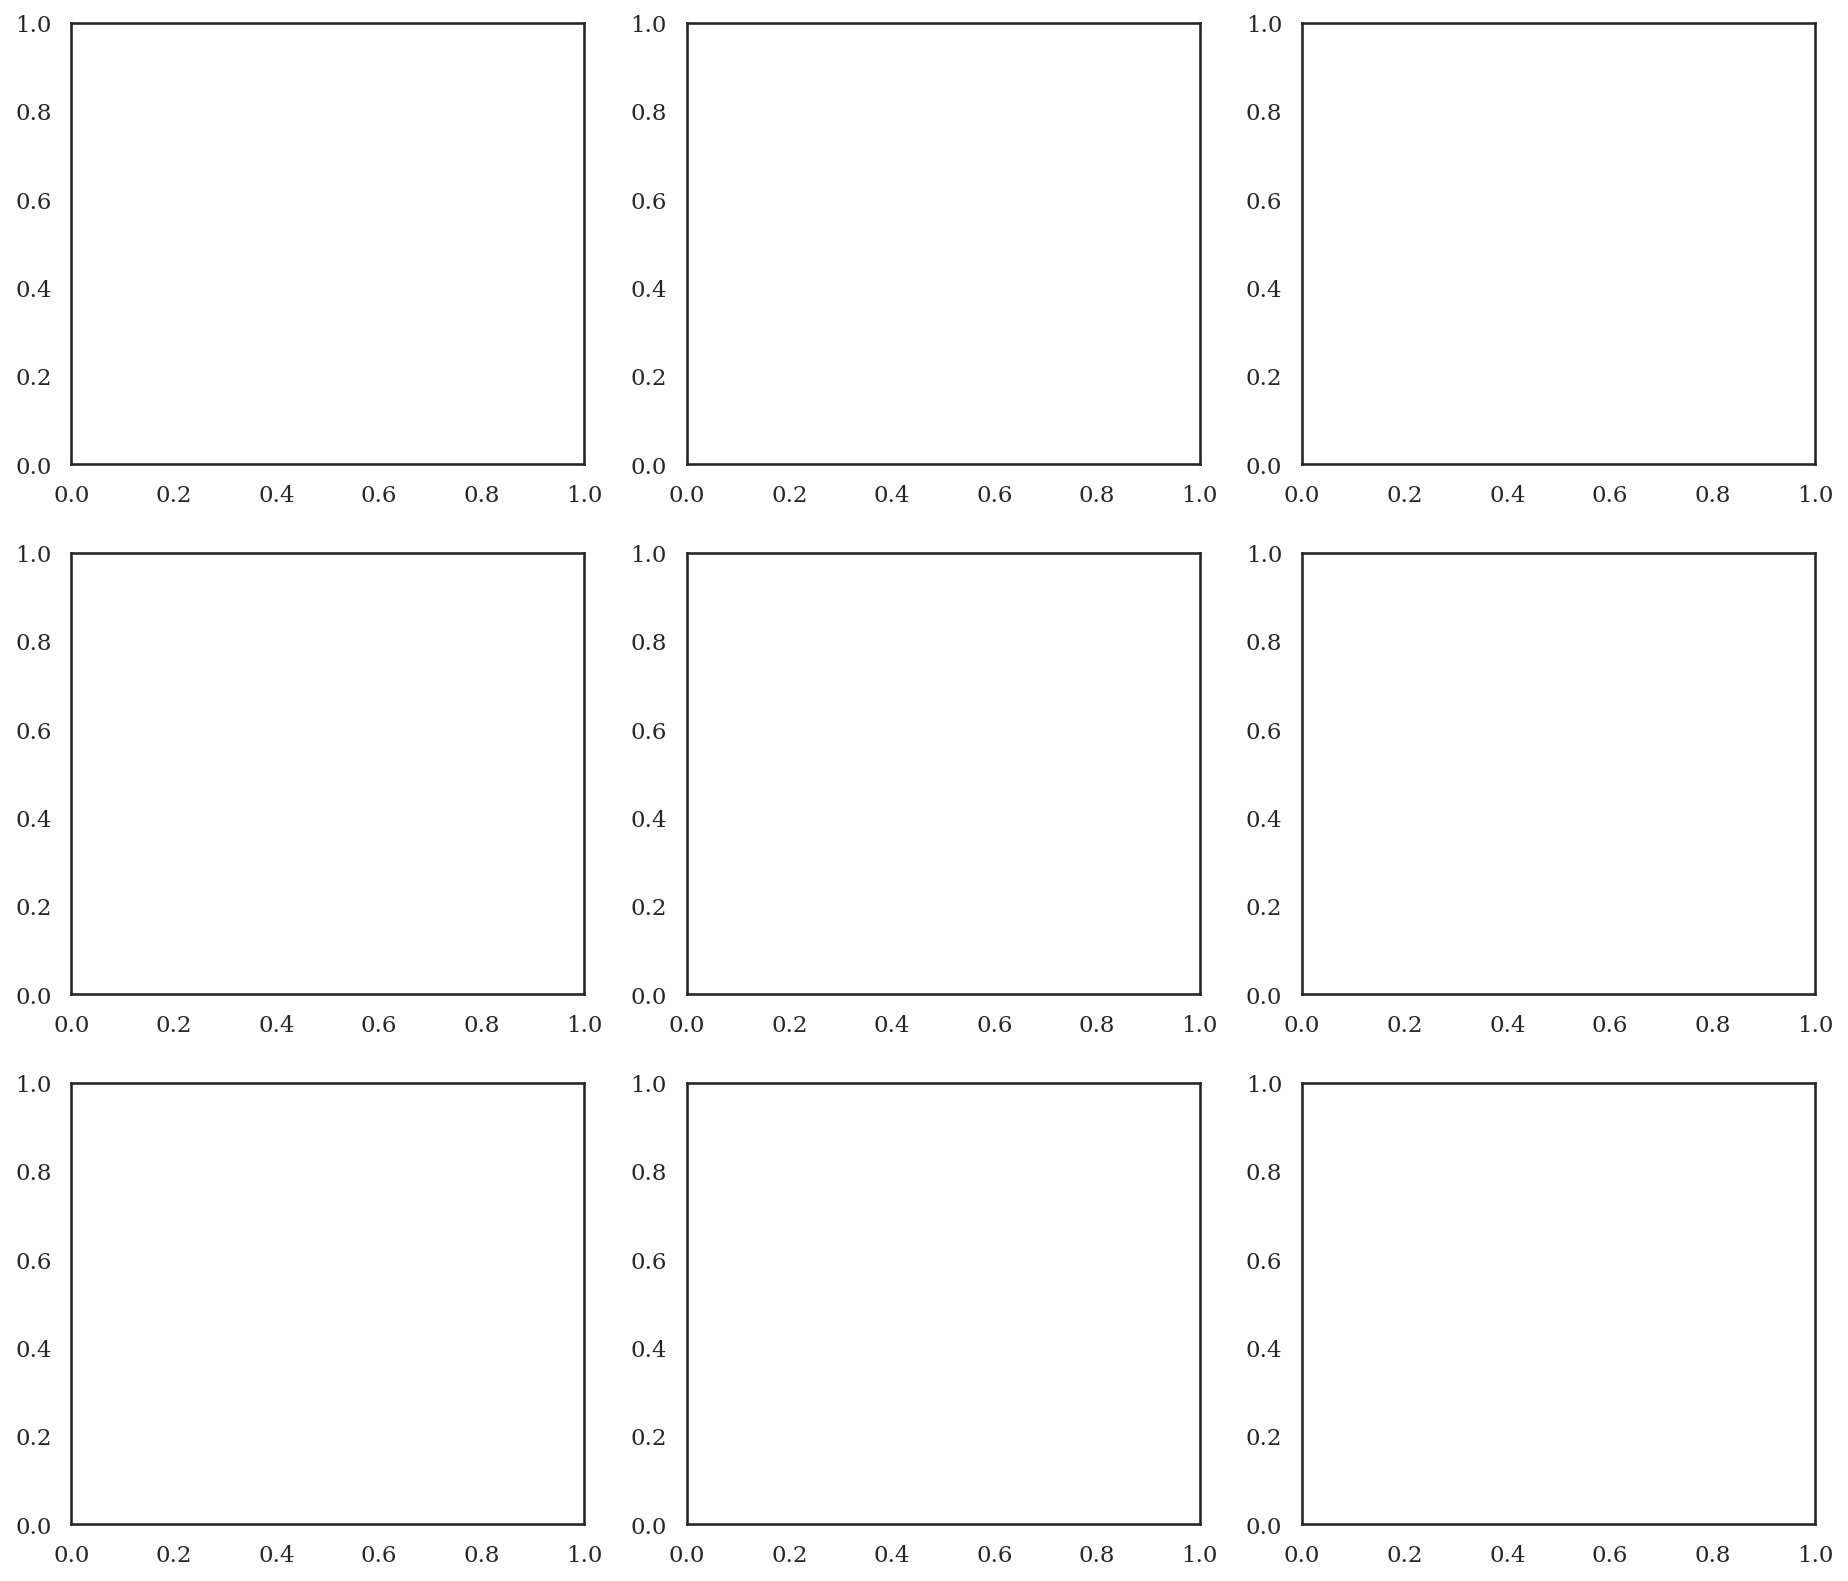

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# =====================================================
# CSV
# =====================================================
roc_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/roc_raw/roc_raw_all.csv"


N_CLASSES = 3

COLOR_MAP = {
    "SVM": "#1f77b4",
    "VCLF": "#ff7f0e",
    "XGB": "#2ca02c",
    "RF": "#d62728"
}

# =====================================================
# ROC çizim fonksiyonu
# =====================================================
def plot_roc(ax, df_sub, title):
    for model_name in df_sub["base_model"].unique():
        sub = df_sub[df_sub["base_model"] == model_name]

        y_true = label_binarize(sub["true_label"], classes=[0, 1, 2])
        y_score = sub[[f"proba_class_{i}" for i in range(N_CLASSES)]].values

        fpr, tpr = {}, {}
        for i in range(N_CLASSES):
            fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(N_CLASSES)]))
        mean_tpr = np.zeros_like(all_fpr)

        for i in range(N_CLASSES):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= N_CLASSES

        macro_auc = auc(all_fpr, mean_tpr)

        ax.plot(
            all_fpr,
            mean_tpr,
            lw=2,
            color=COLOR_MAP.get(model_name, "black"),
            label=f"{model_name} (AUC = {macro_auc:.3f})"
        )

    ax.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=1)
    ax.set_title(title)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(fontsize=9)
    ax.grid(True)

# =====================================================
# Subplotlar
# =====================================================
fig, axes = plt.subplots(3, 3, figsize=(15, 13))

# Wavelet
plot_roc(axes[0, 0], df[(df["filter_method"] == "wavelet") & (df["base_model"] == "SVM")], "SVM + Wavelet")
plot_roc(axes[0, 1], df[(df["filter_method"] == "wavelet") & (df["base_model"] == "VCLF")], "VCLF + Wavelet")
plot_roc(axes[0, 2], df[(df["filter_method"] == "wavelet") & (df["base_model"] == "XGB")], "XGB + Wavelet")

# SMOTE
plot_roc(axes[1, 0], df[(df["filter_method"].str.lower() == "smote") & (df["base_model"] == "SVM_SMOTE")], "SVM + SMOTE")
plot_roc(axes[1, 1], df[(df["filter_method"].str.lower() == "smote") & (df["base_model"] == "VCLF_SMOTE")], "VCLF + SMOTE")

# Baseline & None
plot_roc(axes[1, 2], df[(df["filter_method"] == "baseline") & (df["base_model"] == "SVM")], "SVM Baseline")
plot_roc(axes[2, 1], df[(df["filter_method"] == "none") & (df["base_model"] == "RF")], "RF (No Filtering)")

# Boş subplotları kapat
axes[2, 0].axis("off")
axes[2, 2].axis("off")

plt.tight_layout()
plt.savefig("/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/ROC_Comparison.png", dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
print(df["filter_method"].value_counts())
print(df["base_model"].value_counts())

filter_method
none              825
lowpass           825
wavelet           825
moving_average    825
ema               825
savgol            825
loess             825
spline            825
kalman            825
median            825
hampel            825
gaussian          825
Name: count, dtype: int64
base_model
DT      900
GNB     900
RF      900
SVM     900
LR      900
MLP     900
XGB     900
VCLF    900
LGB     900
CNN     900
LSTM    900
Name: count, dtype: int64


📊 En İyi Wavelet Modellerinin Hata Matrisleri Çiziliyor...
Seçilen Wavelet Modelleri:
  base_model filter_method  f1_macro
1        XGB       wavelet  0.956944
2        SVM       wavelet  0.956583
4       VCLF       wavelet  0.956583


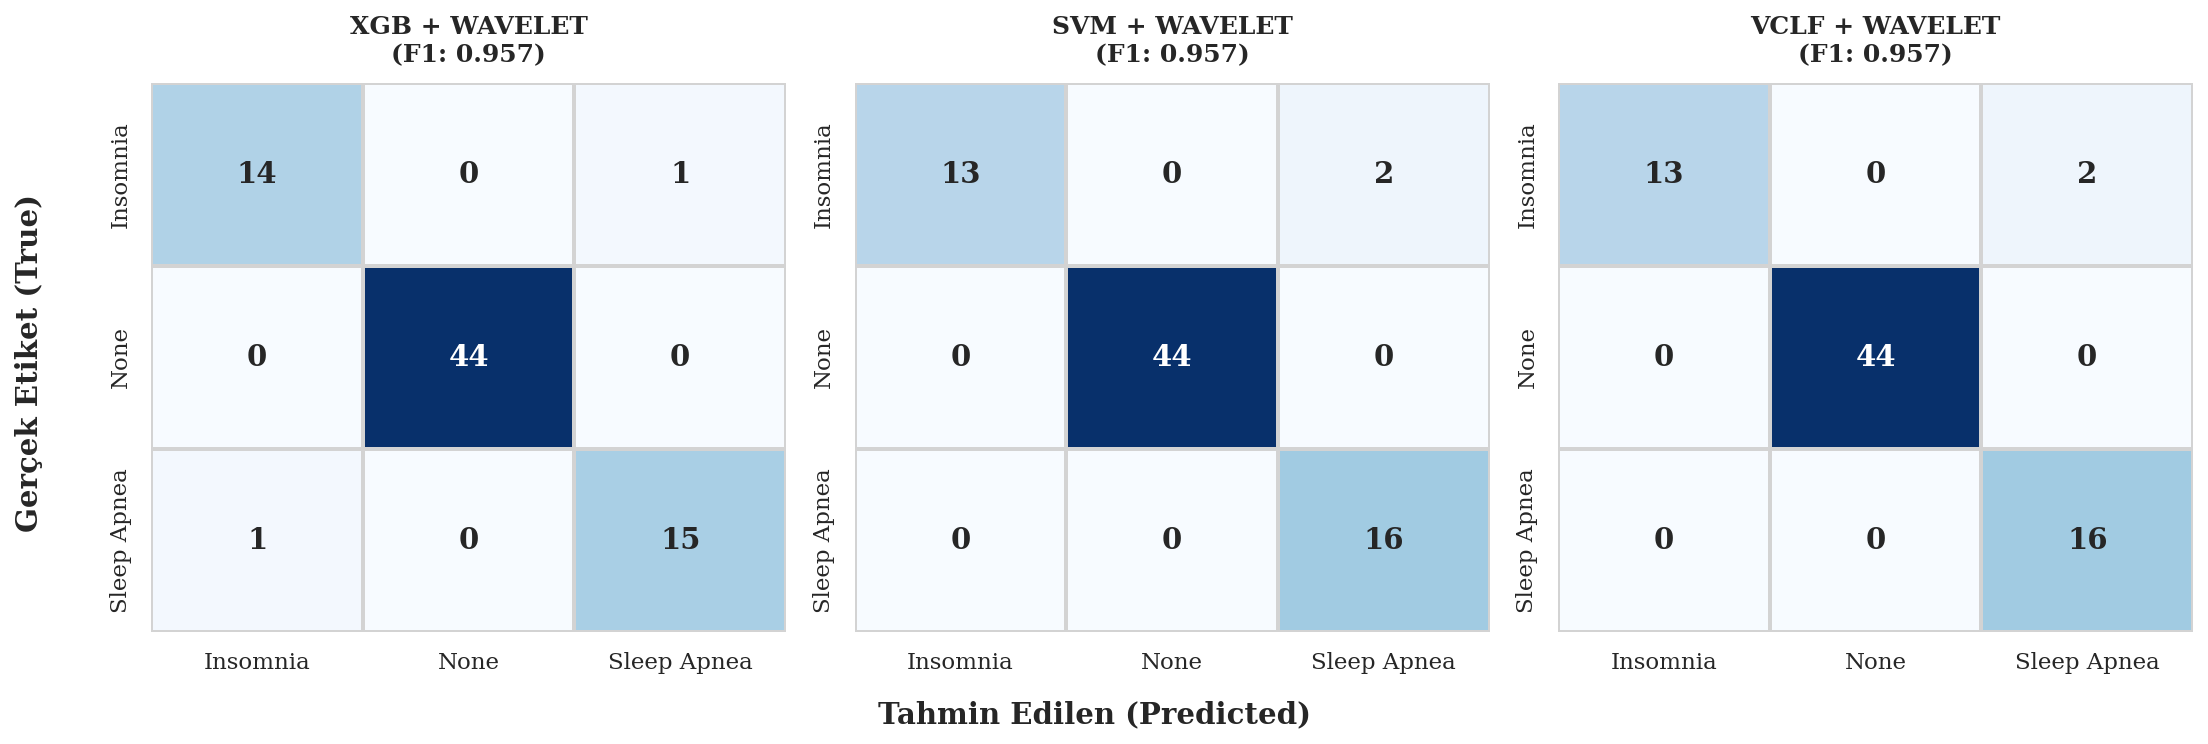

✅ Görsel kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/confusion_matrices_wavelet_models.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

# Görsel Ayarları
sns.set_theme(style="white")
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.family"] = "serif"

# Dosya Yolları
METRICS_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/filtered_metrics_all.csv"
TABLES_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/"

print("📊 En İyi Wavelet Modellerinin Hata Matrisleri Çiziliyor...")

if os.path.exists(METRICS_PATH):
    # 1. Sonuçları Oku ve Filtrele
    df = pd.read_csv(METRICS_PATH)
    # Sadece wavelet + (XGB, SVM, VCLF) modellerini al
    top_models = df[
        (df['filter_method'] == 'wavelet') & 
        (df['base_model'].isin(['XGB', 'SVM', 'VCLF']))
    ].sort_values(by="f1_macro", ascending=False)
    
    print(f"Seçilen Wavelet Modelleri:\n{top_models[['base_model', 'filter_method', 'f1_macro']]}")

    # 2. Grid Ayarları (1 Satır x 3 Sütun)
    n_cols = 3
    n_rows = math.ceil(len(top_models) / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() 
    
    cmap = "Blues"

    for i, (index, row) in enumerate(top_models.iterrows()):
        model_name = row['base_model']
        filter_name = row['filter_method']
        score = row['f1_macro']
        
        # Dosya adını oluştur
        cm_filename = f"confusion_matrix_{model_name}_{filter_name}.csv"
        cm_path = os.path.join(TABLES_DIR, cm_filename)
        
        ax = axes[i]
        
        if os.path.exists(cm_path):
            cm_df = pd.read_csv(cm_path, index_col=0, na_filter=False)
            
            sns.heatmap(
                cm_df, 
                annot=True, 
                fmt="d", 
                cmap=cmap, 
                cbar=False, 
                ax=ax, 
                linewidths=1, 
                linecolor='lightgray',
                annot_kws={"size": 14, "weight": "bold"}
            )
            
            title = f"{model_name} + {filter_name.upper()}\n(F1: {score:.3f})"
            ax.set_title(title, fontweight='bold', size=12, pad=10)
            ax.set_xlabel(""); ax.set_ylabel("")
            
        else:
            ax.text(0.5, 0.5, "Dosya Bulunamadı", ha='center', va='center', color='red')
            ax.set_title(f"{model_name} + {filter_name}")

    # Boş kalan grafikleri gizle
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ortak Eksen İsimleri
    fig.text(0.5, 0.02, 'Tahmin Edilen (Predicted)', ha='center', fontsize=14, fontweight='bold')
    fig.text(0.02, 0.5, 'Gerçek Etiket (True)', va='center', rotation='vertical', fontsize=14, fontweight='bold')

    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    
    save_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/confusion_matrices_wavelet_models.png"
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Görsel kaydedildi: {save_path}")

else:
    print("❌ Metrik dosyası bulunamadı.")

📊 Tüm modellerin skorları hesaplanıyor...

🏆 SEÇİLEN EN İYİ 6 MODEL (SMOTE/Baseline Hariç):
1. RF + wavelet (AUC: 0.9982)
2. LSTM + none (AUC: 0.9982)
3. RF + none (AUC: 0.9966)
4. VCLF + wavelet (AUC: 0.9965)
5. LSTM + wavelet (AUC: 0.9965)
6. SVM + wavelet (AUC: 0.9963)

✅ Grafik Kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/ROC_Top6_Filtered_Best.png


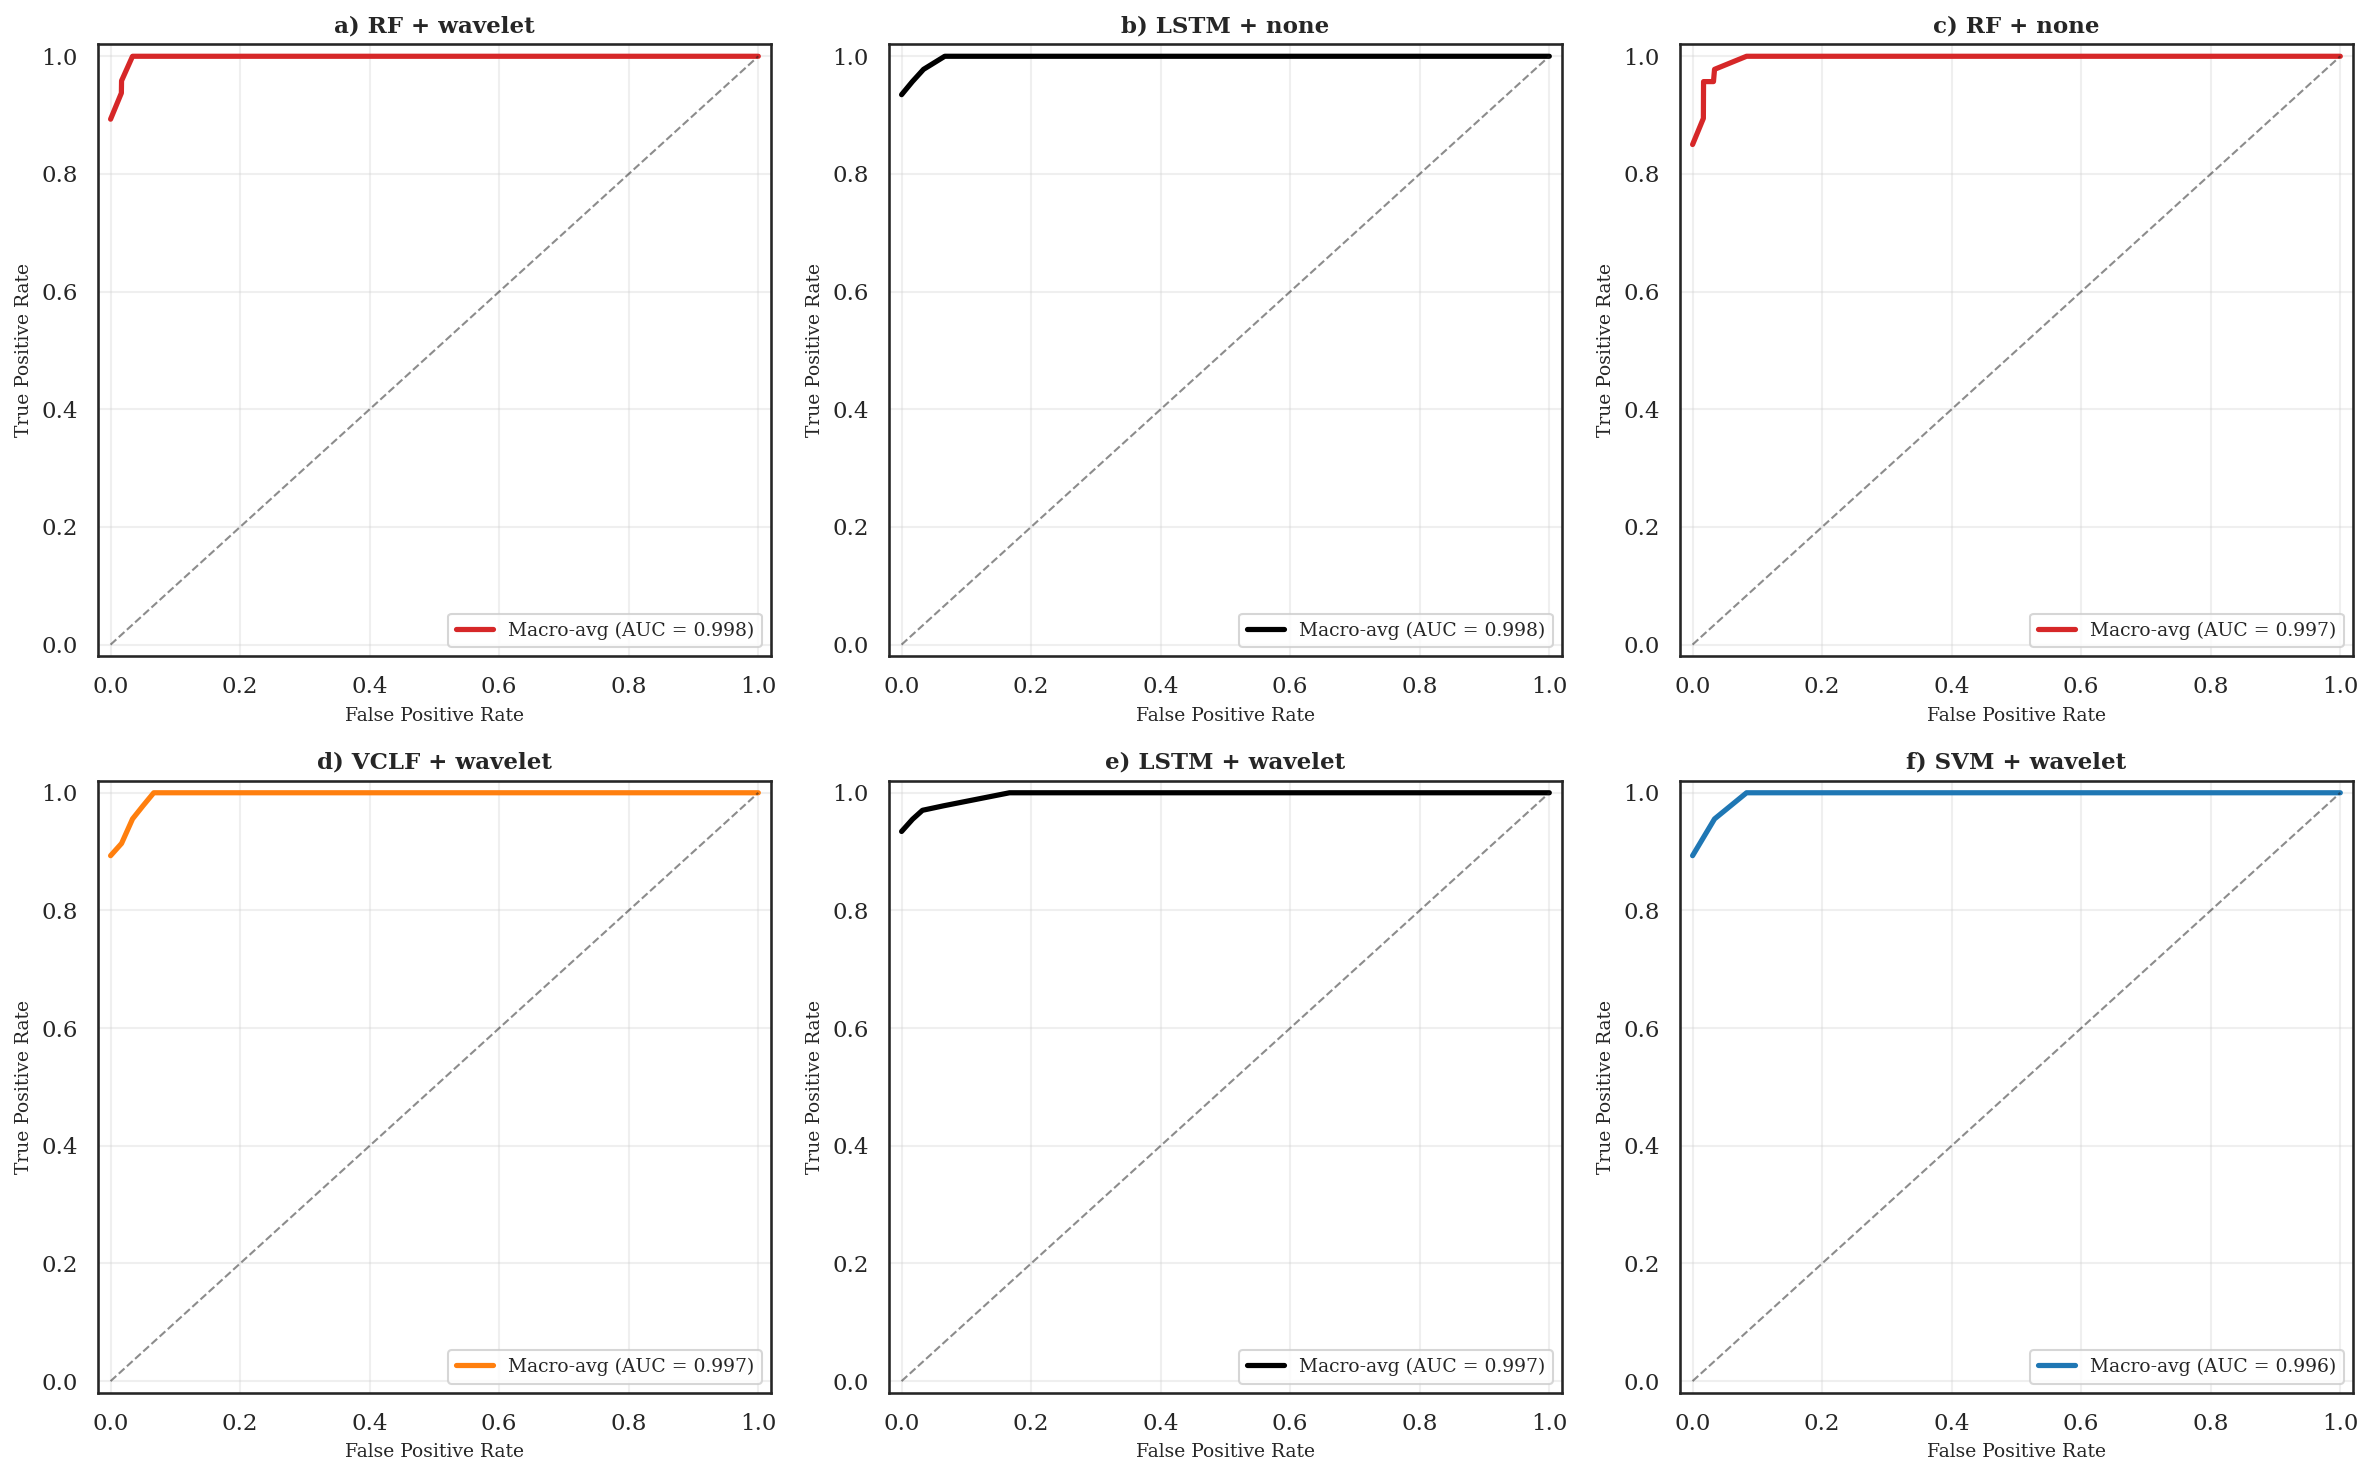

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# =====================================================
# 1. AYARLAR
# =====================================================
roc_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/roc_raw/roc_raw_all.csv"
output_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/ROC_Top6_Filtered_Best.png"
N_CLASSES = 3

# Renk Paleti (Model adına göre)
COLOR_MAP = {
    "XGB": "#2ca02c",  # Yeşil
    "SVM": "#1f77b4",  # Mavi
    "VCLF": "#ff7f0e", # Turuncu
    "RF": "#d62728",   # Kırmızı
    "LR": "#9467bd",   # Mor
    "MLP": "#8c564b",  # Kahverengi
    "CNN": "#e377c2"   # Pembe
}

# =====================================================
# 2. VERİ YÜKLEME VE SKOR HESAPLAMA
# =====================================================
try:
    df = pd.read_csv(roc_path)
except FileNotFoundError:
    print(f"❌ Dosya bulunamadı: {roc_path}")
    exit()

# Tüm Model + Yöntem kombinasyonlarını bul
grouped = df.groupby(['base_model', 'filter_method'])
ranking_list = []

print("📊 Tüm modellerin skorları hesaplanıyor...")

for (model, method), group in grouped:
    # --- FİLTRELEME ADIMI (SMOTE ve Baseline İstemiyoruz) ---
    method_str = str(method).lower()
    if "smote" in method_str or "baseline" in method_str:
        continue  # Atla

    # ROC-AUC Hesapla
    try:
        y_true = label_binarize(group["true_label"], classes=[0, 1, 2])
        y_score = group[[f"proba_class_{i}" for i in range(N_CLASSES)]].values
        
        # Macro-Average AUC
        fpr, tpr = {}, {}
        all_fpr = np.unique(np.concatenate([
            roc_curve(y_true[:, i], y_score[:, i])[0] for i in range(N_CLASSES)
        ]))
        
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(N_CLASSES):
            fpr_i, tpr_i, _ = roc_curve(y_true[:, i], y_score[:, i])
            mean_tpr += np.interp(all_fpr, fpr_i, tpr_i)
        mean_tpr /= N_CLASSES
        
        macro_auc = auc(all_fpr, mean_tpr)
        
        # Listeye ekle: (Skor, Model, Yöntem, DataFrame)
        ranking_list.append({
            "score": macro_auc,
            "label": f"{model} + {method}",
            "model": model,
            "method": method,
            "data": group
        })
    except Exception as e:
        print(f"⚠️ Hata ({model}+{method}): {e}")

# =====================================================
# 3. SIRALAMA VE İLK 6'YI SEÇME
# =====================================================
# Skora göre büyükten küçüğe sırala
ranking_list.sort(key=lambda x: x['score'], reverse=True)

# İlk 6 taneyi al
top_6 = ranking_list[:6]

print(f"\n🏆 SEÇİLEN EN İYİ 6 MODEL (SMOTE/Baseline Hariç):")
for i, item in enumerate(top_6):
    print(f"{i+1}. {item['label']} (AUC: {item['score']:.4f})")

# =====================================================
# 4. ÇİZİM (2x3 GRID)
# =====================================================
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Harf etiketi için (a, b, c...)
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

for i, ax in enumerate(axes):
    if i < len(top_6):
        item = top_6[i]
        group = item['data']
        model_name = item['model']
        
        # --- TEKRAR HESAPLA VE ÇİZ ---
        y_true = label_binarize(group["true_label"], classes=[0, 1, 2])
        y_score = group[[f"proba_class_{i}" for i in range(N_CLASSES)]].values
        
        # Macro Average Çizimi
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for cls in range(N_CLASSES):
            fpr[cls], tpr[cls], _ = roc_curve(y_true[:, cls], y_score[:, cls])
            
        all_fpr = np.unique(np.concatenate([fpr[cls] for cls in range(N_CLASSES)]))
        mean_tpr = np.zeros_like(all_fpr)
        for cls in range(N_CLASSES):
            mean_tpr += np.interp(all_fpr, fpr[cls], tpr[cls])
        mean_tpr /= N_CLASSES
        macro_auc = auc(all_fpr, mean_tpr)

        # Çizgi Rengi
        color = COLOR_MAP.get(model_name, "black")
        
        ax.plot(all_fpr, mean_tpr, 
                color=color, lw=2.5, 
                label=f"Macro-avg (AUC = {macro_auc:.3f})")
        
        # Referans Çizgisi
        ax.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5)

        # Başlık ve Etiketler
        # Başlık Örn: a) XGB + Wavelet
        ax.set_title(f"{letters[i]}) {item['label']}", fontsize=11, fontweight='bold')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('False Positive Rate', fontsize=9)
        ax.set_ylabel('True Positive Rate', fontsize=9)
        ax.legend(loc="lower right", fontsize=9)
        ax.grid(True, alpha=0.3)
    else:
        # 6'dan az model varsa boş kutuyu kapat
        ax.axis('off')

plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Grafik Kaydedildi: {output_path}")
plt.show()

📊 Tüm modellerin skorları hesaplanıyor...

🏆 LİSTEYE GİREN İLK 6 (Grafiğe Basılıyor):
1. RF + Wavelet (AUC: 0.9982)
2. LSTM + None (Filtreleme Yok) (AUC: 0.9982)
3. RF + None (Filtreleme Yok) (AUC: 0.9966)
4. VCLF + Wavelet (AUC: 0.9965)
5. LSTM + Wavelet (AUC: 0.9965)
6. SVM + Wavelet (AUC: 0.9963)

✅ Grafik Kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/ROC_Top6_Final_Truth.png


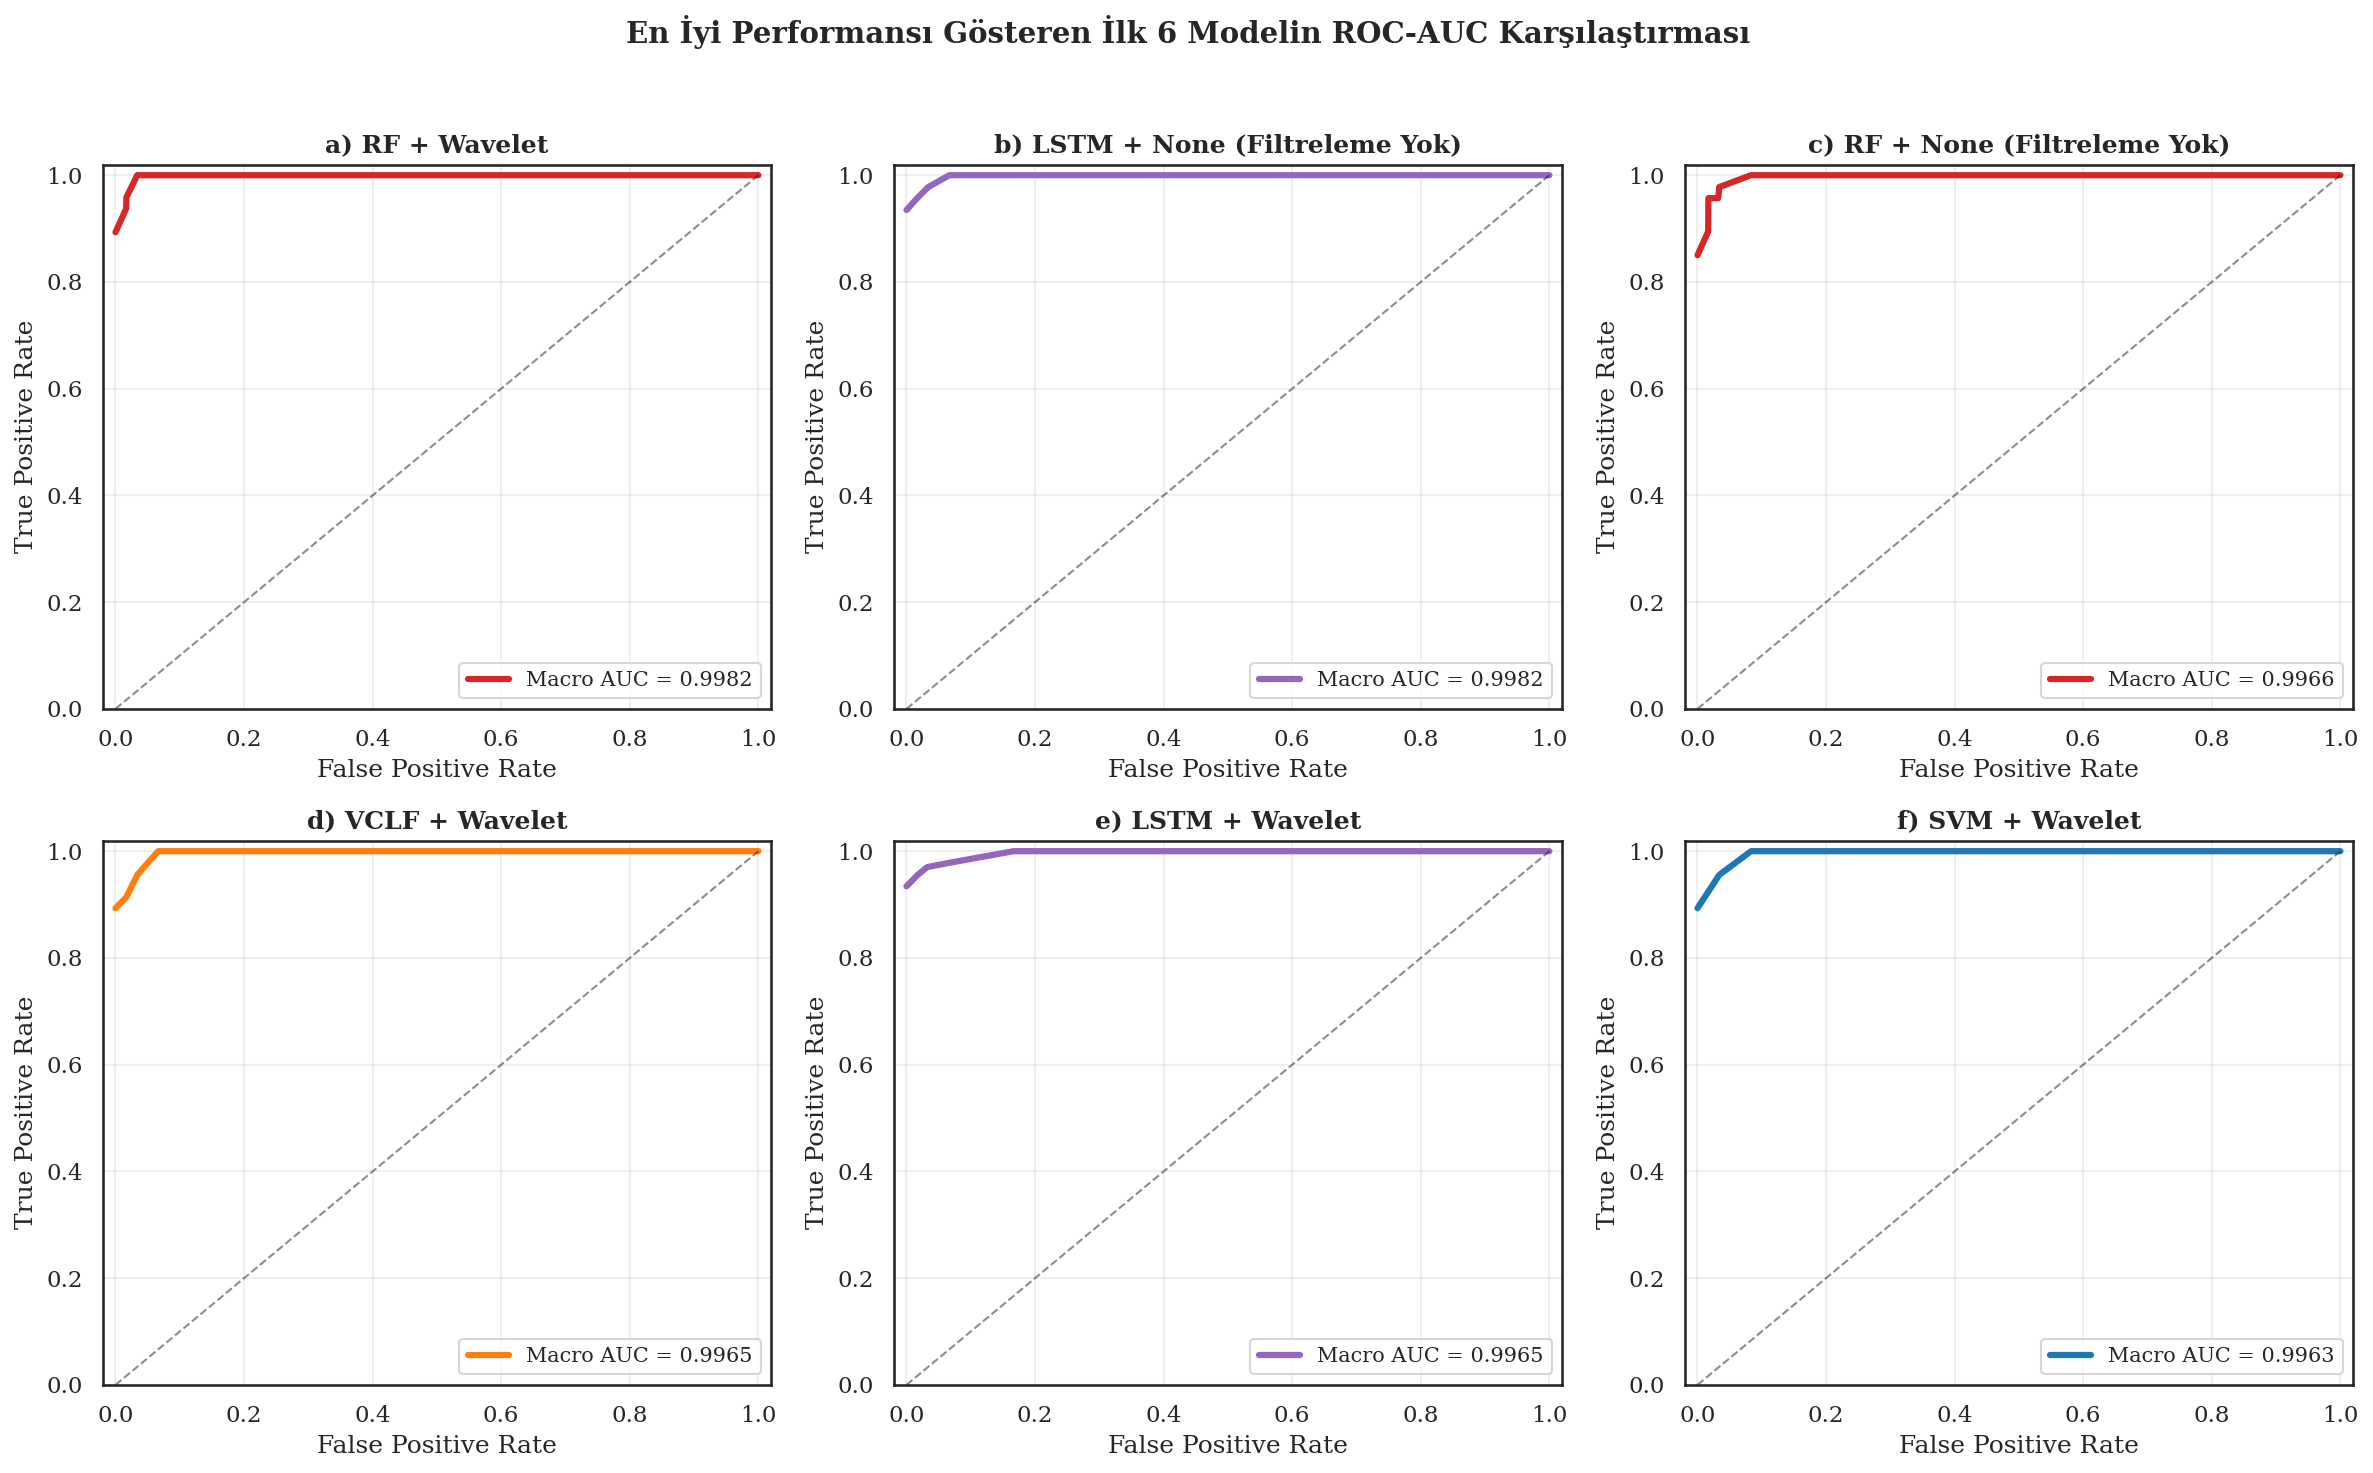

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# =====================================================
# 1. AYARLAR
# =====================================================
roc_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/roc_raw/roc_raw_all.csv"
output_path = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/ROC_Top6_Final_Truth.png"
N_CLASSES = 3

# Renk Paleti (Model türüne göre)
COLOR_MAP = {
    "LSTM": "#9467bd", # Mor (Yeni Lider)
    "RF": "#d62728",   # Kırmızı
    "VCLF": "#ff7f0e", # Turuncu
    "XGB": "#2ca02c",  # Yeşil
    "SVM": "#1f77b4",  # Mavi
    "CNN": "#e377c2"   # Pembe
}

# =====================================================
# 2. VERİ YÜKLEME VE SKOR HESAPLAMA
# =====================================================
try:
    df = pd.read_csv(roc_path)
except FileNotFoundError:
    print(f"❌ Dosya bulunamadı: {roc_path}")
    exit()

grouped = df.groupby(['base_model', 'filter_method'])
ranking_list = []

print("📊 Tüm modellerin skorları hesaplanıyor...")

for (model, method), group in grouped:
    # SMOTE ve Baseline'ı ELE (Senin isteğin üzerine)
    method_str = str(method).lower()
    if "smote" in method_str or "baseline" in method_str:
        continue

    try:
        y_true = label_binarize(group["true_label"], classes=[0, 1, 2])
        y_score = group[[f"proba_class_{i}" for i in range(N_CLASSES)]].values
        
        # Macro-Average AUC
        fpr, tpr = {}, {}
        all_fpr = np.unique(np.concatenate([
            roc_curve(y_true[:, i], y_score[:, i])[0] for i in range(N_CLASSES)
        ]))
        
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(N_CLASSES):
            fpr_i, tpr_i, _ = roc_curve(y_true[:, i], y_score[:, i])
            mean_tpr += np.interp(all_fpr, fpr_i, tpr_i)
        mean_tpr /= N_CLASSES
        
        macro_auc = auc(all_fpr, mean_tpr)
        
        # Filtre ismini güzelleştir
        display_method = "Wavelet" if method_str == "wavelet" else method_str.capitalize()
        if method_str == "none": display_method = "None (Filtreleme Yok)"

        ranking_list.append({
            "score": macro_auc,
            "label": f"{model} + {display_method}",
            "model": model,
            "method": method,
            "data": group
        })
    except Exception as e:
        pass

# =====================================================
# 3. SIRALAMA VE İLK 6'YI SEÇME
# =====================================================
ranking_list.sort(key=lambda x: x['score'], reverse=True)
top_6 = ranking_list[:6]

print(f"\n🏆 LİSTEYE GİREN İLK 6 (Grafiğe Basılıyor):")
for i, item in enumerate(top_6):
    print(f"{i+1}. {item['label']} (AUC: {item['score']:.4f})")

# =====================================================
# 4. ÇİZİM (2x3 GRID)
# =====================================================
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
letters = ['a', 'b', 'c', 'd', 'e', 'f']

for i, ax in enumerate(axes):
    if i < len(top_6):
        item = top_6[i]
        group = item['data']
        
        # Tekrar hesapla ve çiz
        y_true = label_binarize(group["true_label"], classes=[0, 1, 2])
        y_score = group[[f"proba_class_{i}" for i in range(N_CLASSES)]].values
        
        fpr = dict()
        tpr = dict()
        for cls in range(N_CLASSES):
            fpr[cls], tpr[cls], _ = roc_curve(y_true[:, cls], y_score[:, cls])
            
        all_fpr = np.unique(np.concatenate([fpr[cls] for cls in range(N_CLASSES)]))
        mean_tpr = np.zeros_like(all_fpr)
        for cls in range(N_CLASSES):
            mean_tpr += np.interp(all_fpr, fpr[cls], tpr[cls])
        mean_tpr /= N_CLASSES
        macro_auc = auc(all_fpr, mean_tpr)

        color = COLOR_MAP.get(item['model'], "black")
        
        # Ana ROC Eğrisi
        ax.plot(all_fpr, mean_tpr, color=color, lw=3, label=f"Macro AUC = {macro_auc:.4f}")
        ax.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5)

        ax.set_title(f"{letters[i]}) {item['label']}", fontsize=12, fontweight='bold')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc="lower right", fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([0.0, 1.02]) # Y eksenini 0'dan başlatmak daha şık durur
    else:
        ax.axis('off')

plt.suptitle("En İyi Performansı Gösteren İlk 6 Modelin ROC-AUC Karşılaştırması", fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Başlık için yer aç
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Grafik Kaydedildi: {output_path}")
plt.show()

📊 En İyi 6 Modelin Hata Matrisleri Hazırlanıyor...

🏆 SEÇİLEN İLK 6 MODEL:

  base_model filter_method  f1_macro  accuracy
0         RF          none  0.956944  0.973333
4       VCLF          none  0.956583  0.973333
5       VCLF       wavelet  0.956583  0.973333
1        CNN          none  0.956583  0.973333
3        SVM       wavelet  0.956583  0.973333
2        SVM          none  0.956583  0.973333


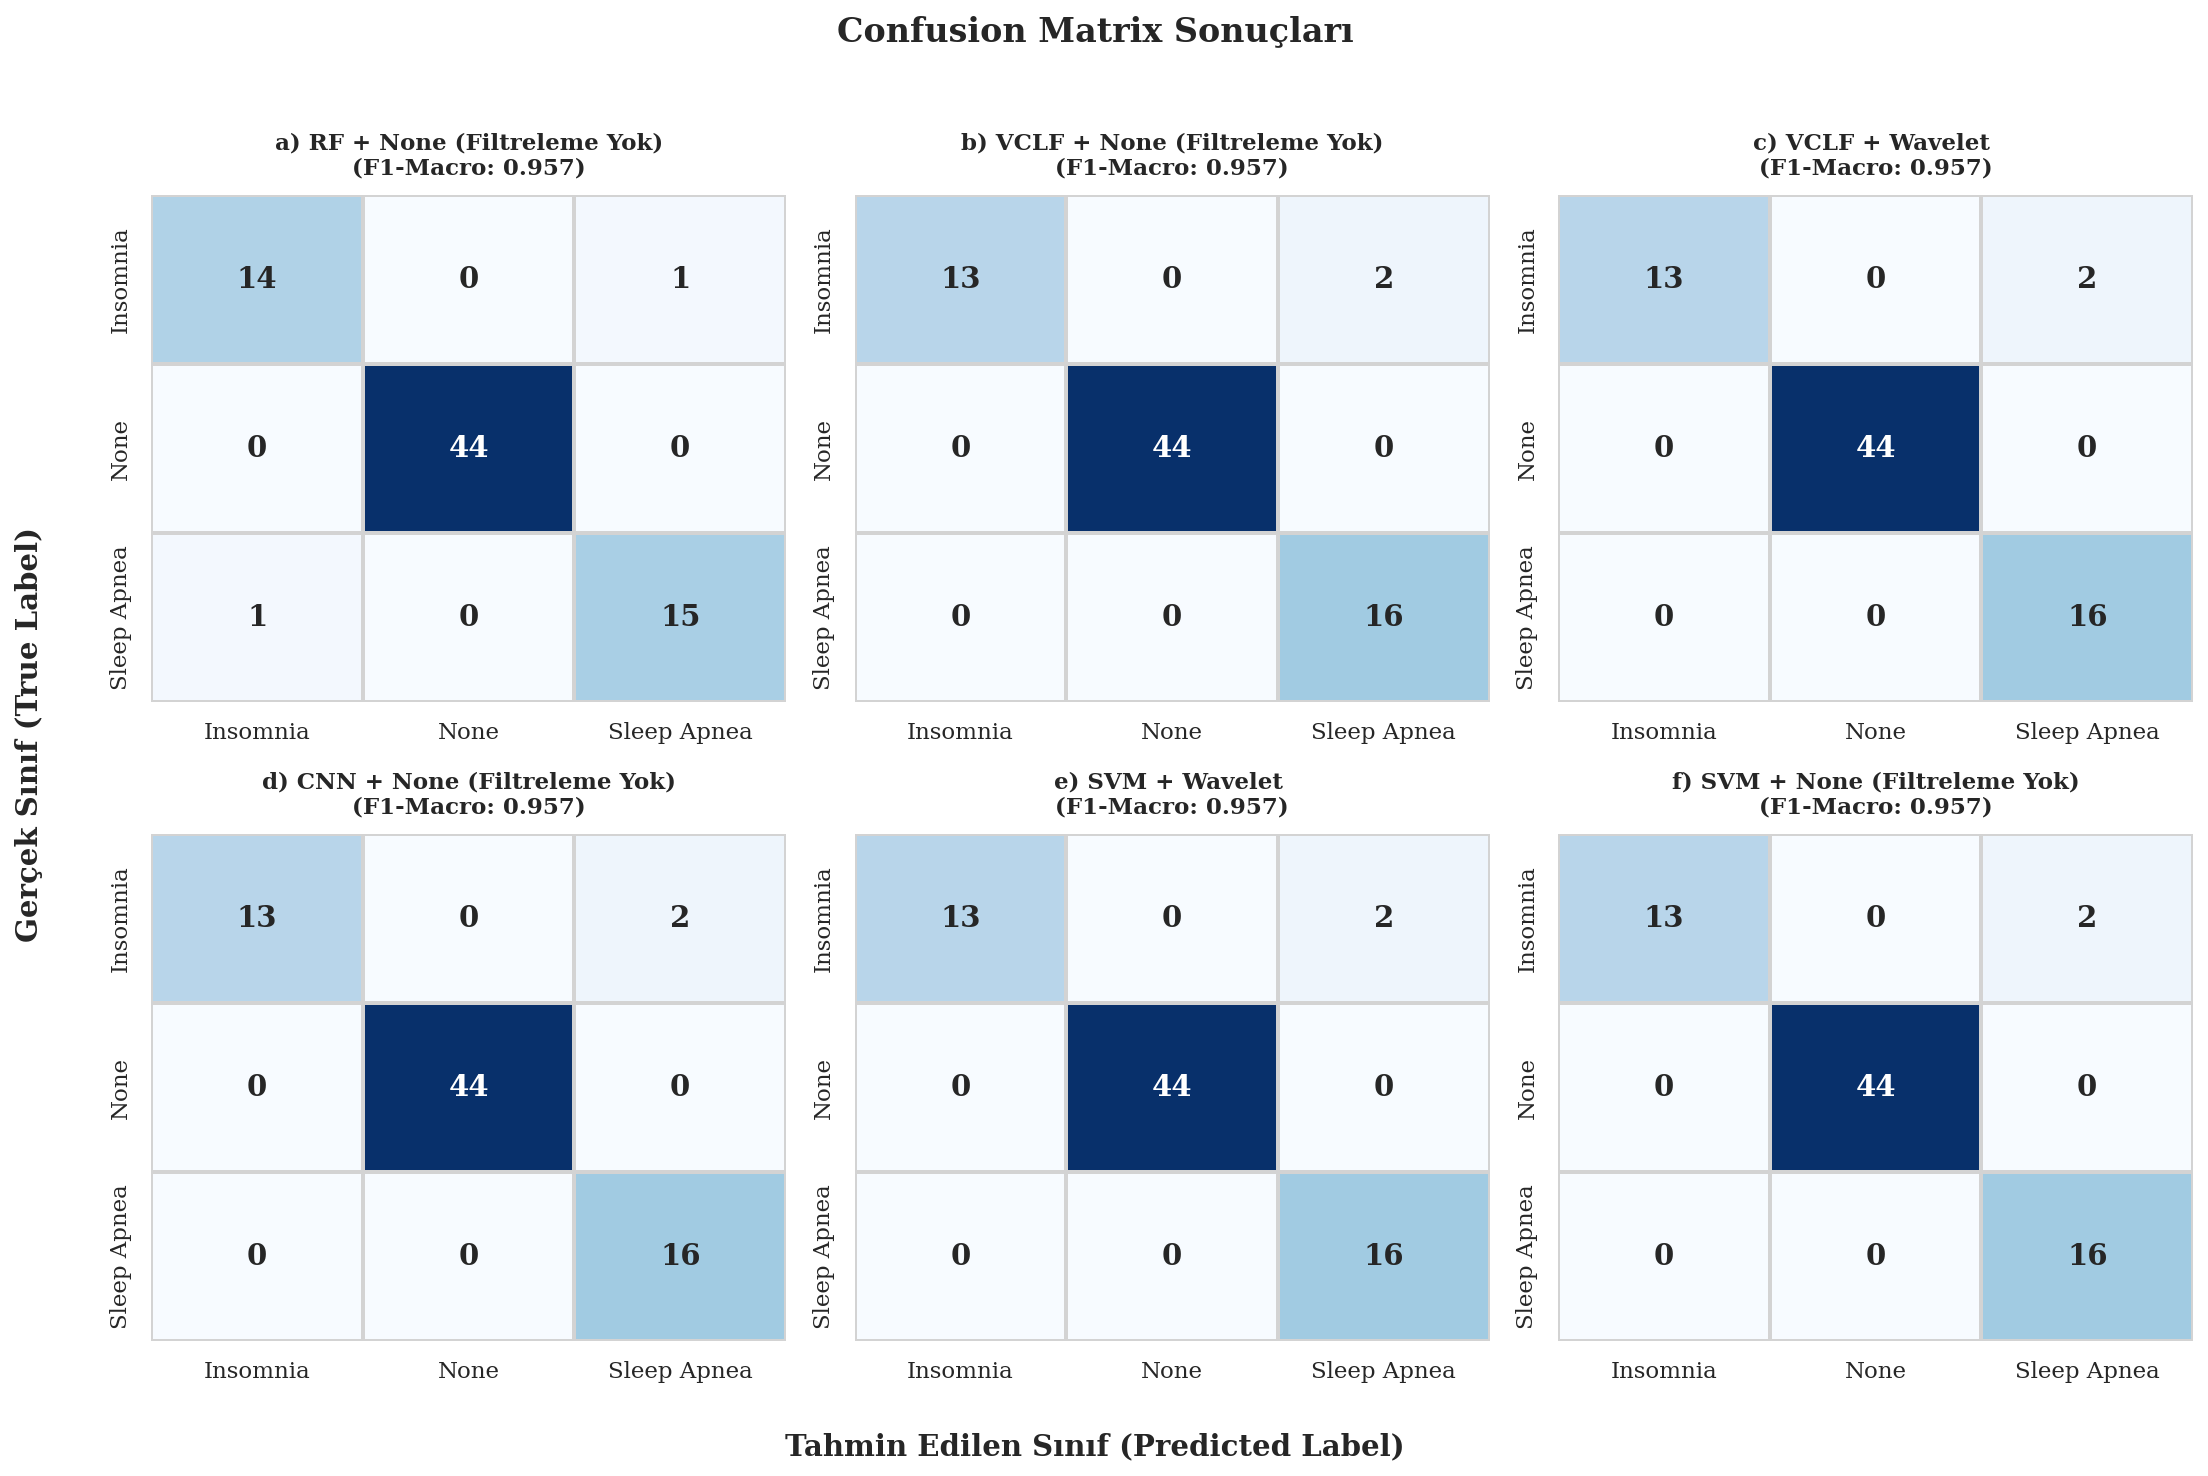

✅ Görsel başarıyla kaydedildi: /Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/Confusion_Matrix_Top6.png


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# =====================================================
# AYARLAR
# =====================================================
METRICS_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/filtered_metrics_all.csv"
TABLES_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/"
OUTPUT_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/figures/Confusion_Matrix_Top6.png"

# Görsel Ayarları
sns.set_theme(style="white")
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.family"] = "serif"

def plot_top6_cm():
    print("📊 En İyi 6 Modelin Hata Matrisleri Hazırlanıyor...")

    if not os.path.exists(METRICS_PATH):
        print(f"❌ Metrik dosyası bulunamadı: {METRICS_PATH}")
        return

    # 1. Sonuçları Oku
    df = pd.read_csv(METRICS_PATH)

    # 2. Sırala ve İlk 6'yı Seç (Filtre/Model ayrımı yapmaksızın)
    # F1-Macro'ya göre büyükten küçüğe sırala
    top_6_models = df.sort_values(by="f1_macro", ascending=False).head(6)

    print(f"\n🏆 SEÇİLEN İLK 6 MODEL:\n")
    print(top_6_models[['base_model', 'filter_method', 'f1_macro', 'accuracy']])

    # 3. Grid Ayarları (2 Satır x 3 Sütun)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # Harf etiketleri (Makale formatı için)
    letters = ['a', 'b', 'c', 'd', 'e', 'f']
    cmap = "Blues"

    for i, (index, row) in enumerate(top_6_models.iterrows()):
        model_name = row['base_model']
        filter_name = row['filter_method']
        score = row['f1_macro']
        
        # Dosya adını oluştur (CSV'deki formata uygun olmalı)
        # Örn: confusion_matrix_XGB_wavelet.csv
        cm_filename = f"confusion_matrix_{model_name}_{filter_name}.csv"
        cm_path = os.path.join(TABLES_DIR, cm_filename)
        
        ax = axes[i]
        
        if os.path.exists(cm_path):
            try:
                cm_df = pd.read_csv(cm_path, index_col=0, na_filter=False)
                
                # Heatmap Çizimi
                sns.heatmap(
                    cm_df, 
                    annot=True, 
                    fmt="d", 
                    cmap=cmap, 
                    cbar=False, 
                    ax=ax, 
                    linewidths=1, 
                    linecolor='lightgray',
                    annot_kws={"size": 14, "weight": "bold"}
                )
                
                # Başlığı Süsle
                display_filter = "Wavelet " if filter_name == "wavelet" else filter_name.capitalize()
                if filter_name == "none": display_filter = "None (Filtreleme Yok)"
                
                title = f"{letters[i]}) {model_name} + {display_filter}\n(F1-Macro: {score:.3f})"
                ax.set_title(title, fontweight='bold', size=11, pad=10)
                
                # Eksen isimlerini sadece kenarlara koy (temizlik için)
                ax.set_xlabel("")
                ax.set_ylabel("")
                
            except Exception as e:
                ax.text(0.5, 0.5, f"Okuma Hatası", ha='center', va='center', color='red')
                print(f"Hata: {e}")
        else:
            ax.text(0.5, 0.5, "Dosya Yok", ha='center', va='center', color='red')
            ax.set_title(f"{model_name} + {filter_name}")
            print(f"⚠️ Dosya bulunamadı: {cm_path}")

    # Ortak Eksen İsimleri (Figür geneli için)
    fig.text(0.5, 0.02, 'Tahmin Edilen Sınıf (Predicted Label)', ha='center', fontsize=14, fontweight='bold')
    fig.text(0.02, 0.5, 'Gerçek Sınıf (True Label)', va='center', rotation='vertical', fontsize=14, fontweight='bold')

    # Başlık
    plt.suptitle("Confusion Matrix Sonuçları", fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])
    plt.savefig(OUTPUT_PATH, bbox_inches='tight', dpi=300)
    plt.show()
    
    print(f"✅ Görsel başarıyla kaydedildi: {OUTPUT_PATH}")

if __name__ == "__main__":
    plot_top6_cm()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
METRICS_PATH = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/filtered_metrics_all.csv"
TABLES_DIR = "/Users/melih/Desktop/sleep-project/sleep-disorder-signal-processing/results/tables-filtered/"
df = pd.read_csv(METRICS_PATH)

    # 2. Sırala ve İlk 6'yı Seç (Filtre/Model ayrımı yapmaksızın)
    # F1-Macro'ya göre büyükten küçüğe sırala
top_6_models = df.sort_values(by="f1_macro", ascending=False).head(10)
print(f"\n🏆 SEÇİLEN İLK 10 MODEL:\n")
print(top_6_models[['base_model', 'filter_method', 'f1_macro', 'accuracy']])


🏆 SEÇİLEN İLK 10 MODEL:

  base_model filter_method  f1_macro  accuracy
0         RF          none  0.956944  0.973333
4       VCLF          none  0.956583  0.973333
5       VCLF       wavelet  0.956583  0.973333
1        CNN          none  0.956583  0.973333
3        SVM       wavelet  0.956583  0.973333
2        SVM          none  0.956583  0.973333
6        GNB          none  0.949889  0.960000
7       LSTM       wavelet  0.949369  0.960000
9        MLP       wavelet  0.943077  0.960000
8        MLP          none  0.943077  0.960000
